# matplotlib的可视化方式

- matplotlib实际上有多种使用方式：
    - 直接使用原生的matplotlib；
    - 在Pandas中对matplotlib的封装；
        - 用于简单的统计数据可视化
    - matplotlib的高级封装Seaborn；
        - 用于统计数据可视化

- 使用场景：
    - Web应用
    - 桌面应用
    - 移动端应用等。

# Seaborn 入门与编程模式

## 安装

- Python的安装还是那么简单
    - `pip  install  seaborn`

## Seaborn的编程模式

- Seaborn的优点：
    - 就是绘制简单；
    - 更多更简单的样式控制
    

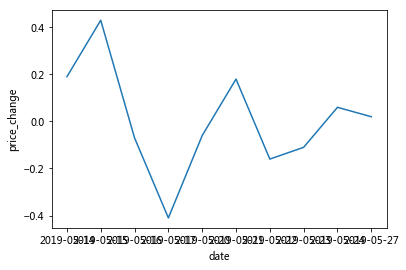

In [1]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns #加载会导致matplotlib的默认作图风格变成seaborn

data = ts.get_hist_data('000001') #一次性获取全部日k线数据
data = data[0:10]

# 直接绘制
sns.lineplot(data.index,data['price_change'])
# 显示
plt.show()

## Seaborn的优点体验

### 样式的优点

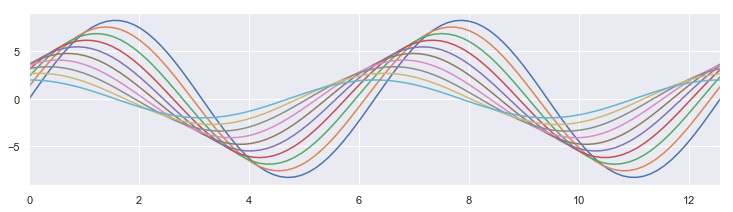

In [2]:
%matplotlib inline 
import numpy as np
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()   # 可以注释这段代码体验默认样式，当然样式的设置不仅仅这么简单，也可以这么简单
# 样式主要包含主题与颜色

figure = plt.figure('图形', figsize=(12,3))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8])
x = np.linspace(0, 4*np.pi, 100)
ax.set_xlim(0, 4*np.pi)
for i in np.linspace(0, np.pi, 10):
    ax.plot(x, np.sin(x + i * .5) * (np.pi - i + 1)*2)

plt.show()

### 图形的多样性的便捷性

- 提供更加多样的图形。

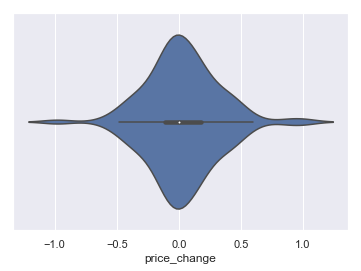

In [3]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns #加载会导致matplotlib的默认作图风格变成seaborn

data = ts.get_hist_data('000001') #一次性获取全部日k线数据
data = data[0:100]

# 绘制小提琴图
sns.violinplot(x= data['price_change'])   # 箱线图与密度图的结合（密度图还可以分成上下两个曲线）

# 显示
plt.show()

# ------------------
# 提示：如果出现警告，请更新scipy的版本, 一般低于1.1.0的会出现警告，我写这个文档的时候，更新到1.3.0。


### 数据的内置性

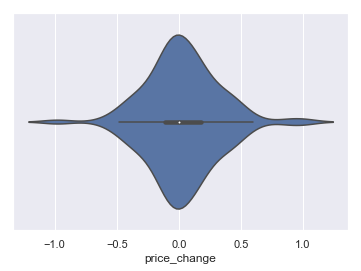

In [4]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 

data = ts.get_hist_data('000001') #一次性获取全部日k线数据
data = data[0:100]
data['p_change'] = data['p_change']>=0
# 绘制小提琴图
sns.violinplot(x='price_change', hue='p_change', data=data,)   # 箱线图与密度图的结合（密度图还可以分成上下两个曲线）

# 显示
plt.show()
# data[0:3]

### 与matplotlib的接口调用

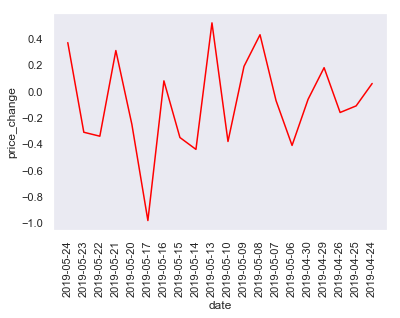

In [5]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 

data = ts.get_hist_data('000001') #一次性获取全部日k线数据
data = data[0:20]

# 直接绘制
ax = sns.lineplot(data.index,data['price_change'], color=(1,0,0,1))   # matplotlib参数使用变参自由设置

# 通过返回的坐标系，直接设置
ax.set_xticklabels(labels=data.index, rotation=90)   # 刻度标签
ax.grid(b=False)  # 直接控制网格
# 显示e
plt.show()

# Seaborn的结构与模式

## Seaborn封装模式

- Seaborn是Matplotlib的高级封装
  - 对Matplotlib的类使用函数封装
  - 对Matplotlib的函数进行二次封装，因为Matplotlib的函数参数非常复杂。


- Seaborn主要优点：
  - 简化了图的创建、属性管理等。
  - 简化了坐标系的创建、属性管理等。
  - 增加内置主题，改进了默认的matplotlib美学。
  - 有可选择的调色板工具，更加方便制作漂亮图形。
  - 用于绘制统计时间序列数据的函数，具有灵活的估计和表示估计周围的不确定性。
  - 用于构建图形网格的高级抽象，可以轻松构建复杂的可视化。
 
 
- 提示：使用Seanborn时，由于其省略了创建图对象，如果想自己管理图对象，请使用Matplotlib方法得到图对象。

## API结构

- 辅助修饰：
  - Style
  - Color
- 核心功能：
  - 把数据集分成子集使用子图显示。
  - 对数据集进行初步的处理可视化。
    - 统计可视化。
    - 回归可视化。

- API reference
    - Relational plots：关系图
    - Categorical plots：分类图
    - Distribution plots：分布图
    - Regression plots：回归图
    - Matrix plots：矩阵图/热图
    - Multi-plot grids：多种网格图
    - Style control：样式控制
    - Color palettes：调色板
    - Palette widgets：调色板小部件
    - Utility functions：实用功能

# Seaborn的样式(Style)与颜色(Color)

## 样式与颜色函数API说明


- 样式分成两组函数  
    - 设置主题样式
    - 设置相关参数
    
- 样式与参数设置：`set([context, style, palette, font, …])`
    - 样式
        - 返回样式：`axes_style([style, rc])`
        - 设置样式：`set_style([style, rc])`
    - 参数
        - 返回参数：`plotting_context([context, font_scale, rc])`
        - 设置参数：`set_context([context, font_scale, rc])`
    - 其他函数：
        - `set_color_codes([palette])`：更改Matplotlib颜色简写的的说明。
        - `reset_defaults()`：恢复到RC的缺省设置（RC是matplotlib的参数设置）
        - `reset_orig()`：恢复到RC的原始设置
- 颜色调色板的函数
    - 设置调色板：`set_palette(palette[, n_colors, desat, …])`
    - 使用调色板获取颜色：`color_palette([palette, n_colors, desat])`

## set样式设置与参数设置

- set函数定义：

```python
    seaborn.set(
        context='notebook', # 调整好的样式，只会改变标签、线条等一些参数，不会改变整体样式。 
        style='darkgrid', # 显示背景网格。
        palette='deep', # 调色板样本。
        font='sans-serif', # 字体。
        font_scale=1, # 字体大小。
        color_codes=True, # 支持rgb颜色代码。
        rc=None)
```

- color_codes:
    - 当palette是seaborn颜色模板，并且color_codes=True，则支持'r','g','b'等颜色代码。

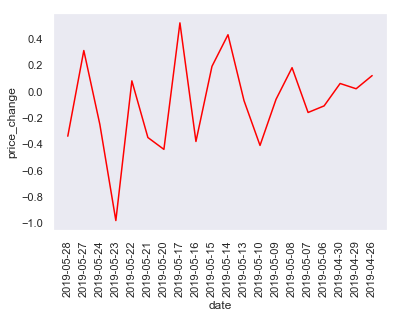

In [7]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 

# 默认设置
sns.set()   

data = ts.get_hist_data('000001') #一次性获取全部日k线数据
data = data[0:20]

# 直接绘制
ax = sns.lineplot(data.index,data['price_change'], color=(1,0,0,1))   # matplotlib参数使用变参自由设置

# 通过返回的坐标系，直接设置
ax.set_xticklabels(labels=data.index, rotation=90)   # 刻度标签
ax.grid(b=False)  # 直接控制网格

# 显示
plt.show()

## context参数

- context参数类型可以两种方式：
    - RC参数字典。
    - RC参数预先设置名，名字只能是如下字符串：paper, notebook, talk, poster；默认是notebook。

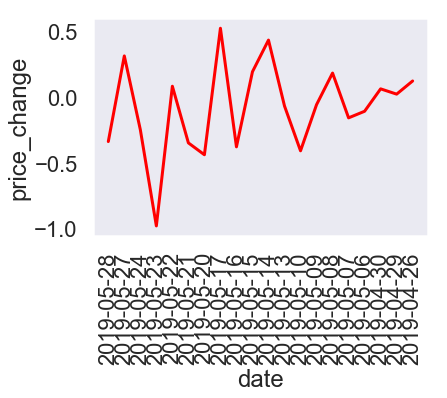

In [10]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 

# 设置talk风格
sns.set(context='poster')   

data = ts.get_hist_data('000001') #一次性获取全部日k线数据
data = data[0:20]

# 直接绘制
ax = sns.lineplot(data.index,data['price_change'], color=(1,0,0,1))   # matplotlib参数使用变参自由设置

# 通过返回的坐标系，直接设置
ax.set_xticklabels(labels=data.index, rotation=90)   # 刻度标签
ax.grid(b=False)  # 直接控制网格

# 显示
plt.show()

## 使用plotting_context设置

- `seaborn.plotting_context(context=None, font_scale=1, rc=None)`
    - context：参数；
    - font_scale：字体的独立方法缩放参数；
    - rc：设置matplotlib参数；

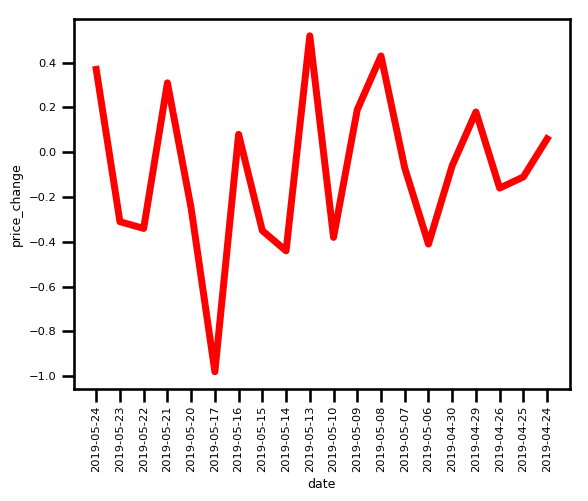

{'axes.labelsize': 9.600000000000001,
 'axes.linewidth': 1.0,
 'axes.titlesize': 9.600000000000001,
 'font.size': 9.600000000000001,
 'grid.linewidth': 0.8,
 'legend.fontsize': 8.8,
 'lines.linewidth': 1.2000000000000002,
 'lines.markersize': 4.800000000000001,
 'patch.linewidth': 0.8,
 'xtick.labelsize': 8.8,
 'xtick.major.size': 4.800000000000001,
 'xtick.major.width': 1.0,
 'xtick.minor.size': 3.2,
 'xtick.minor.width': 0.8,
 'ytick.labelsize': 8.8,
 'ytick.major.size': 4.800000000000001,
 'ytick.major.width': 1.0,
 'ytick.minor.size': 3.2,
 'ytick.minor.width': 0.8}

In [227]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 

# 恢复到缺省设置
sns.reset_defaults() 

# 进行样式设置，有可能被后面的设置覆盖
sns.set_context(context='talk', font_scale=0.5, rc={"lines.linewidth": 5})  

data = ts.get_hist_data('000001') #一次性获取全部日k线数据
data = data[0:20]

# 直接绘制
ax = sns.lineplot(data.index,data['price_change'], color=(1,0,0,1))   # matplotlib参数使用变参自由设置

# 通过返回的坐标系，直接设置
ax.set_xticklabels(labels=data.index, rotation=90)   # 刻度标签
ax.grid(b=False)  # 直接控制网格

# 显示
plt.show()
sns.plotting_context('paper')

## style参数

- 用来设置坐标轴的样式，类型是字典类型或者设置好的字符串样式名
    - 预置的样式名包含：{darkgrid, whitegrid, dark, white, ticks}

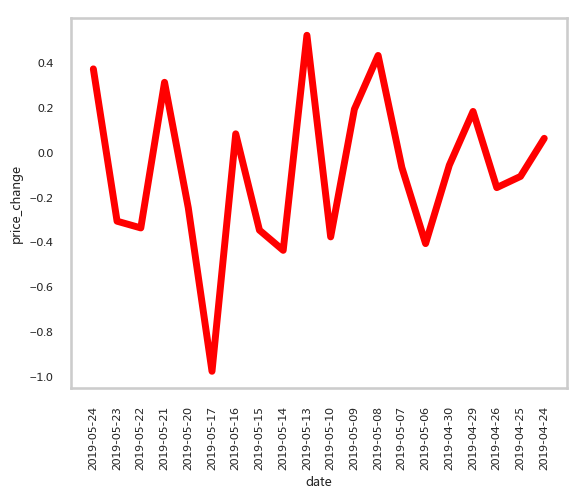

{'axes.axisbelow': True,
 'axes.edgecolor': '.15',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': '.15',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': '.15',
 'xtick.bottom': True,
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False}

In [228]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 


sns.reset_defaults()   # 恢复到缺省设置
sns.set(
    context='talk', 
    style='whitegrid',
    font='Microsoft YaHei', 
    font_scale=0.5,
    rc={"lines.linewidth": 5})  # 有可能被后面的设置覆盖


data = ts.get_hist_data('000001') #一次性获取全部日k线数据
data = data[0:20]

# 直接绘制
ax = sns.lineplot(data.index,data['price_change'], color=(1,0,0,1))   # matplotlib参数使用变参自由设置

# 通过返回的坐标系，直接设置
ax.set_xticklabels(labels=data.index, rotation=90)   # 刻度标签
ax.grid(b=False)  # 直接控制网格
# 显示e
plt.show()

sns.axes_style('ticks')

## 使用axes_style坐标轴的样式：

-  `seaborn.axes_style(style=None, rc=None)`

## palette参数

- 用来指名颜色模板名，或者颜色列表。
    - seaborn预置颜色模板包含：deep, muted, bright, pastel, dark, colorblind
- 使用color_palette获取颜色
    - `seaborn.color_palette(palette=None, n_colors=None, desat=None)`

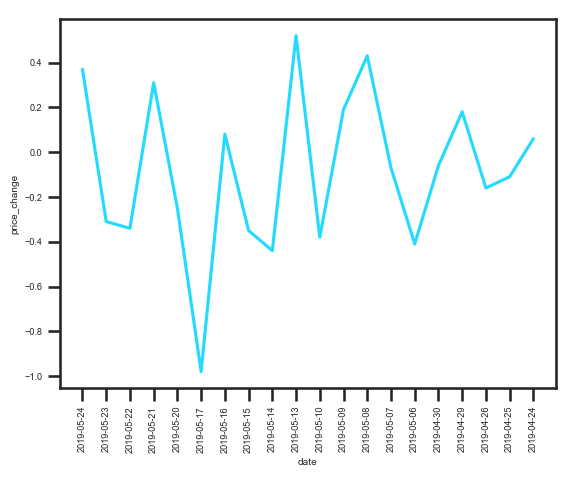

In [207]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 

# 恢复到缺省设置
sns.reset_defaults()   

sns.set(
    context='talk', 
    style='ticks',
    font_scale=0.4,
    palette='cool'   # 调用set_palette：set_palette(palette, color_codes=color_codes)，这里使用的是matplotlib的颜色
)  # 有可能被后面的设置覆盖


data = ts.get_hist_data('000001') #一次性获取全部日k线数据
data = data[0:20]

# 直接绘制
ax = sns.lineplot(data.index,data['price_change'])   # matplotlib参数使用变参自由设置

# 通过返回的坐标系，直接设置
ax.set_xticklabels(labels=data.index, rotation=90)   # 刻度标签
ax.grid(b=False)  # 直接控制网格

# 显示
plt.show()

## 使用set_palette函数设置

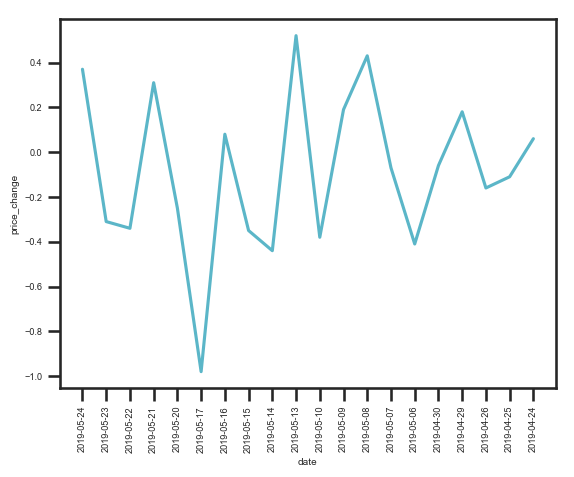

In [220]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 

# 恢复到缺省设置
sns.reset_defaults()   
sns.set(
    context='talk', 
    style='ticks',
    font_scale=0.4
)  # 有可能被后面的设置覆盖

sns.set_palette('cool', n_colors=6, desat=0.5)

data = ts.get_hist_data('000001') #一次性获取全部日k线数据
data = data[0:20]

# 直接绘制
ax = sns.lineplot(data.index,data['price_change'])   # matplotlib参数使用变参自由设置

# 通过返回的坐标系，直接设置
ax.set_xticklabels(labels=data.index, rotation=90)   # 刻度标签
ax.grid(b=False)  # 直接控制网格

# 显示
plt.show()

# Seaborn的图形 - 多种网格图(Multi-plot grids)

- 某些数据需要分成多个子集绘制，网格图提供了自动分组绘制的功能。
- 网格图提供对数据的自动处理。


- 网格图分成3类：
    - Facet grids：多面网格图，用于绘制分成多个方面表示的数据。
    - Pair grids：成对网格图，用于绘制成对关系的数据。
    - Joint grids：合并网格图，用于绘制二变量图的。

- **关键点：**
    - 类的方式构建了坐标系，函数方式绘制每个区域的图。
    - 理解数据分组，因为网格的作用就是把数据分成若干子集显示。
    - 每个不同的网格，子集的划分方式也不同。

## FacetGrids 多面网格

### Facet grids的使用


- Facet grids
    - 把数据集分成多个子集，数据子集的个数由Facet grids的参数确定：
        - row=None, 
        - col=None, 
        - hue=None, 

- 类构造器定义说明

```python
    class seaborn.FacetGrid(
        data, 
        row=None, #! 分类的子集按照行显示。
        col=None, #! 分类的子集按照列显示。
        hue=None, #! 分类的子集按照颜色显示。
        col_wrap=None, #! 逻辑值，在没有row情况下，列能否自动换行（一行绘制不下的时候）。
        sharex=True, #! 多坐标时，是否共享第一个坐标系的x轴（True时除第一个，其余坐标系不显示轴和刻度）。
        sharey=True, #! # 多坐标时，是否共享第一个坐标系的y轴（True时除第一个，其余坐标系不显示轴和刻度）。
        height=3, # 每个坐标系的高度，单位是英寸。
        aspect=1, # 宽和高比例，用来计算宽度= aspect * height。
        palette=None, #! hue使用的颜色。可以是palette name, list, or dict, optional。
        row_order=None, # 行显示分类的顺序，比如鸢尾花分类0，1，2的顺序。
        col_order=None, # 列显示顺序。
        hue_order=None, # 颜色显示顺序。
        hue_kws=None, # 参数字典，用来控制hue的属性，比如marker的样式等，包含颜色。
        dropna=True, # 数据源删除NaN值。
        legend_out=True, # 坐标系外显示主题。
        despine=True, # 去除顶部和右侧的轴/边线。
        margin_titles=False, # row变量指定的行标题显示位置，True显示在右边，False显示在上面。
        xlim=None, # x轴的上下限。
        ylim=None, # y轴的上下限。
        subplot_kws=None, # subplot的参数，坐标轴Axes对象的属性参数。
        gridspec_kws=None, # matplotlib的grid函数的参数，控制网格属性。
        size=None # 这个参数被升级为height参数了，使用的时候，警告会提示。
```

- 此类将数据集映射到多个坐标系上，坐标系的多少由相应数据集中列名的值的类别多少确定；
    - row：指定行数。
    - col：指定列数。
    - hue：指定数据，由不同颜色区别它的值。


- 这3个参数需要依赖data参数的指定数据集（数据集需要是DataFrame，ndarray没有列名）。   
- 指定的数据集的应该是离散的，并且类别统计数量有限，对连续数据不太现实。

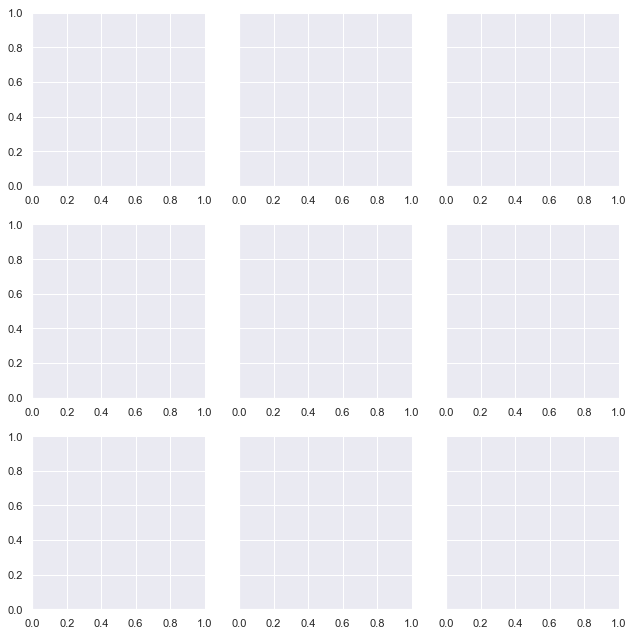

In [6]:
%matplotlib inline 
import tushare as ts
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

# 添加背景网格
sns.set(style="darkgrid") 

data,target= ds.load_iris(return_X_y=True)

# 原鸢尾花的标签合并到第四列，ndarry转成DataFrame类型
iris = pd.DataFrame(np.c_[data, target])  

# col=4表示有4列（因为鸢尾花只有三类，所以坐标系有三个）
# g = sns.FacetGrid(iris, col=4)   # height=5 指定高度

# col=4表示有4列，row=4表示有4行，还可以使用hue用颜色区分值。
g = sns.FacetGrid(iris, row=4, col=4, sharex=False)  

### 在Facet grids网格中绘制图形

- 绘制函数的定义

```python
    FacetGrid.map(func, *args, **kwargs)	# 应用图形绘制函数func到每个facet的数据子集；
    FacetGrid.map_dataframe(func, *args, **kwargs)	# 类似FacetGrid.map，但传递参数（args）与数据（kwargs）
```

#### map函数的应用

- map函数args与kwargs直接传递给func。数据内部自己处理。

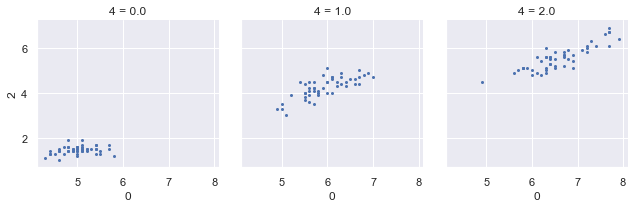

In [50]:
%matplotlib inline 
import tushare as ts
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

# 添加背景网格
sns.set(style="darkgrid") 

data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])

g = sns.FacetGrid(iris, col=4)

g.map(plt.scatter, 0, 2, s=2**2)   # 0是数据集中列名为0的列，2式数据集中列名为2的列，其他属性

#### map_dataframe函数的应用

- 把每次分组调用一次函数，参数有默认传递和子集写的。

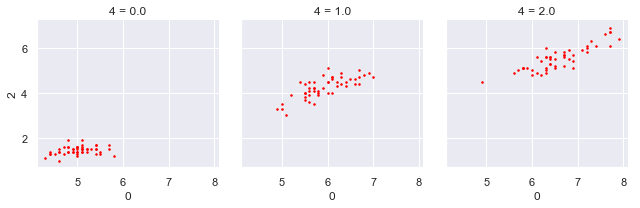

In [51]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd


data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.FacetGrid(iris, col=4)


# 绘制函数
def draw(x, y, **kwargs):   # kwargs额外传递了color与data
    # kwargs 包含两个额外的参数color与data，data是按照FacetGrid中参数分组的。
    ax = plt.gca()
    # 取出数据，取出颜色
    data = kwargs.pop('data')
    color = kwargs.pop('color')
    # ax.scatter(data[x], data[y], color=color, **kwargs)  # 直接使用剩余的参数
    ax.scatter(data[x], data[y], color=(1,0,0,1), **kwargs)

g.map_dataframe(draw, 0, 2, s=3**2, marker='.')

### FacetGrid参数的使用

#### data, row，col，hue参数

- data  ：绘制数据
- row=None,  指定用来指定行数的分组（分组的数据行数决定行数）
- col=None,   指定用来指定列数的分组（分组的数据行数决定列数）
- hue=None,  指定用来指定分颜色显示的分组（分组的数据行数决定颜色的数量）

1. 单独使用row，col

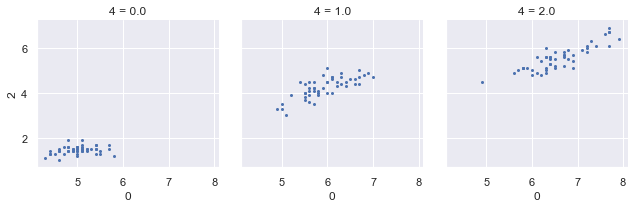

In [28]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd


data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.FacetGrid(iris, col=4)   # 可以把col换成row
g.map(plt.scatter, 0, 2, s=2**2)   # 0是数据集中列名为0的列，2式数据集中列名为2的列，其他属性

2. 单独使用hue参数

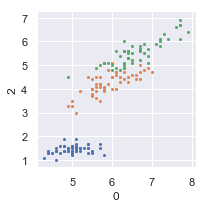

In [29]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd


data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.FacetGrid(iris, hue=4)  # 对4列进行颜色分组
g.map(plt.scatter, 0, 2, s=2**2)   # 0是数据集中列名为0的列，2式数据集中列名为2的列，其他属性

3. 同时使用row，col与hue参数

In [33]:
# 同时使用row，col与hue的情况（因为iris的分组数目多，不适合使用，我们换成Seaborn的官方数据）
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd


data = pd.read_csv('tips.csv')
data[0:2]

(   total_bill   tip     sex smoker  day    time  size
 0       16.99  1.01  Female     No  Sun  Dinner     2
 1       10.34  1.66    Male     No  Sun  Dinner     3, (244, 7))

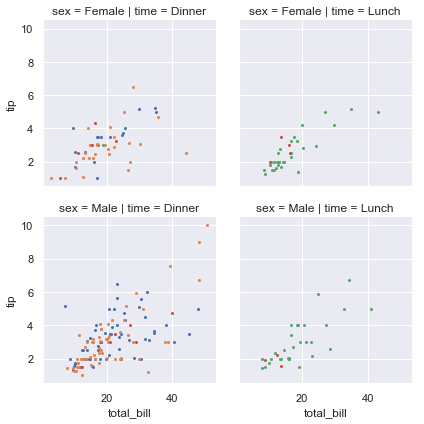

In [39]:
# tips.csv的数据：otal_bill	tip	sex	smoker	day	time	size
# 数据的shape：(244, 7)
# 其中sex， smoker， day，time非常适合分组
g = sns.FacetGrid(data, row='sex', col='time', hue='day')  
# 上面的参数解释按照sex显示2行，按照time显示4列，每个图中数据按照day显示为7中颜色
g.map(plt.scatter, 'total_bill','tip', s=2**2)

####  sharex与sharey参数
    - 设置为True使用一样的坐标参数。否则根据数据情况调整。

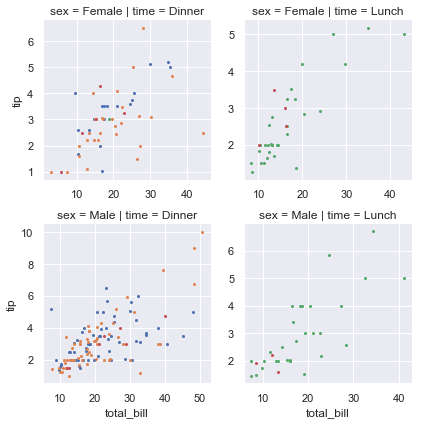

In [40]:
# tips.csv的数据：otal_bill	tip	sex	smoker	day	time	size
# 数据的shape：(244, 7)
# 其中sex， smoker， day，time非常适合分组
g = sns.FacetGrid(data, row='sex', col='time', hue='day',sharex=False,sharey=False)  
# 上面的参数解释按照sex显示2行，按照time显示4列，每个图中数据按照day显示为7中颜色
g.map(plt.scatter, 'total_bill','tip', s=2**2)

#### height（size），aspect，参数

- size已经被height替代。
- 宽度由height * aspect 决定

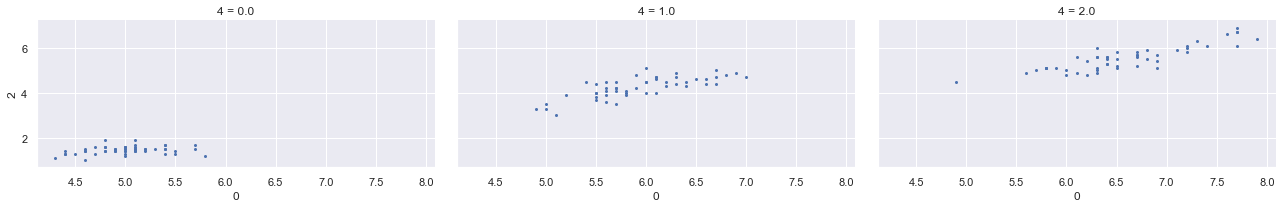

In [46]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd


data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.FacetGrid(iris, col=4, height=3, aspect=2)   
g.map(plt.scatter, 0, 2, s=2**2)   # 0是数据集中列名为0的列，2式数据集中列名为2的列，其他属性

#### row_order,col_order, hue_order参数

- 因为row，col，huer按值分组，所以其中的值在显示的时候会有顺序
    - 比如鸢尾花的3个类别，按照0，1，2显示？还是1，0，2显示？可以使用指定列表指定。

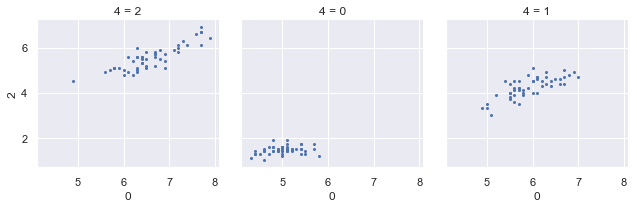

In [48]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd


data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.FacetGrid(iris, col=4, height=3, aspect=1, col_order=[2, 0, 1])   # 可观察每个坐标轴的标题中的内容
g.map(plt.scatter, 0, 2, s=2**2)   

#### palette参数

- 用来指定调色板，数据类型可以是如下类型：
    - palette name, 
    - list, 
    - dict

1. 使用list与dict指定的颜色，这个需要意义对应。

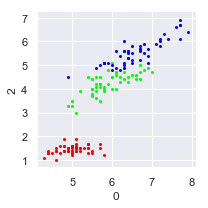

In [55]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd


data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.FacetGrid(
    iris, 
    hue=4, 
    height=3, 
    aspect=1, 
    # palette= [(1,0,0,1),(0,1,0,1),(0,0,1,1)])  
    palette= {
        0.0: (1,0,0,1),    # key对应分组的值。比如：0.0，1.0，2.0
        1.0: (0,1,0,1),
        2.0: (0,0,1,1)
    })  
g.map(plt.scatter, 0, 2, s=2**2)   

2. 使用调色板指定颜色
    - 后面专门讲解下seaborn的颜色；这里简单使用。
    - sns.color_palette(palette='cool', n_colors=3, desat=.5)
        - desat：饱和度，0-1之间的数值。
        - 饱和度是指色彩的鲜艳程度，也称色彩的纯度。
        - 饱和度取决于该色中含色成分和消色成分（灰色）的比例。含色成分越大，饱和度越大；消色成分越大，饱和度越小。
        - 纯的颜色都是高度饱和的，如鲜红，鲜绿。混杂上白色，灰色或其他色调的颜色，是不饱和的颜色，如绛紫，粉红，黄褐等。
        - 完全不饱和的颜色根本没有色调，如黑白之间的各种灰色

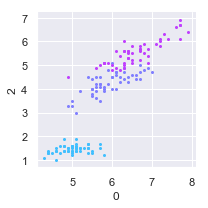

In [62]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

# 从cool调色板中取3个颜色构成调色板（颜色列表）
palette = sns.color_palette(palette='cool', n_colors=3, desat=1)  # 取1表示饱和，颜色彩色度更好。

data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.FacetGrid(
    iris, 
    hue=4, 
    height=3, 
    aspect=1, 
    palette=palette
)
g.map(plt.scatter, 0, 2, s=2**2)   



####  hue_kws参数

- 该参数主要根据绘制图形不同，用来指定用颜色表示分组数据的图形样式。
    - 比如散点图就指定点的样式，折线图就是表示线段的样式。
    
    - kws就是kwargs的意思。
    - 数据类型是字典表示。

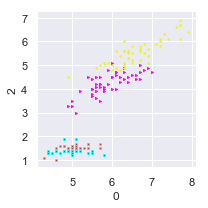

In [68]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

# 从cool调色板中取3个颜色构成调色板（颜色列表）
palette = sns.color_palette(palette='cool', n_colors=3, desat=1)  # 取1表示饱和，颜色彩色度更好。

data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.FacetGrid(
    iris, 
    hue=4, 
    height=3, 
    aspect=1, 
    palette=palette,
    hue_kws={
        'marker':['o','>','<'],
        'color':[(1,0,0,1),(0,1,0,1),(0,0,1,1)],    # 会覆盖palette
        'edgecolor':[(0,1,1),(1,0,1),(1,1,0)]   # 点的边界颜色等
    }
)
g.map(plt.scatter, 0, 2, s=2**2)   

#### legend_out参数

- 控制legend的绘制位置
    - True：扩大Figure，早图的外面绘制主题，否则在图中绘制主题，当然前提是设置显示主题才有效果。

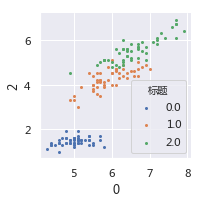

In [138]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.font_manager import FontProperties

# 解决汉字问题
font=FontProperties(fname=r'msyh.ttf',size=14)
# sns.set(font=font.get_name())
sns.set(font='Microsoft YaHei')   




data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])
g = sns.FacetGrid(
    iris, 
    hue=4,
    legend_out=False  # False在内部，True在外部
)  

g.map(plt.scatter, 0,2, s=2**2).add_legend(title='标题')   # 添加主题

#### despine参数

- 取值类型：True或者False，用来控制top与right的坐标系边框的显示。

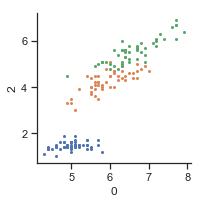

In [140]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.font_manager import FontProperties

# 解决汉字问题
font=FontProperties(fname=r'msyh.ttf',size=14)
# sns.set(font=font.get_name())
sns.set(font='Microsoft YaHei')   

sns.set_style("ticks")   # 用来演示despine的参数的。

data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])
g = sns.FacetGrid(
    iris, 
    hue=4,
    legend_out=False,  # False在内部，True在外部z
    despine=True     # 坐标系top与right的边框，这个需要sns.set_style("ticks")设置显示坐标系才行。默认是False
)  

g.map(plt.scatter, 0,2, s=2**2)

#### margin_titles参数

- 用来控制row变量指定的行标题显示的位置：
    - True : 显示在右边
    - False：显示在上面
    

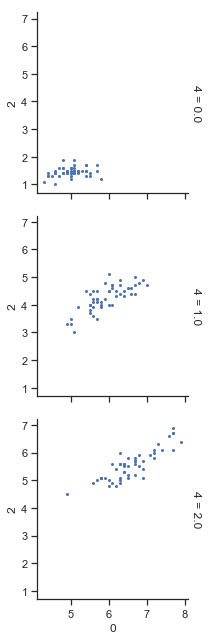

In [149]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd


data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.FacetGrid(
    iris, 
    row=4, 
    margin_titles=True
)   
g.map(plt.scatter, 0, 2, s=2**2)   

#### xlim, ylim参数
    - 控制坐标轴的大小，类型是元组

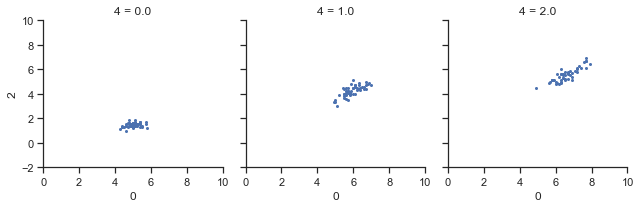

In [150]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd


data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.FacetGrid(
    iris, 
    col=4,
    xlim=(0,10),
    ylim=(-2, 10)
)   
g.map(plt.scatter, 0, 2, s=2**2)   

#### subplot_kws参数

- 用来传递给subplot函数的参数。
    - projection
    - 用来创建子坐标系的参数

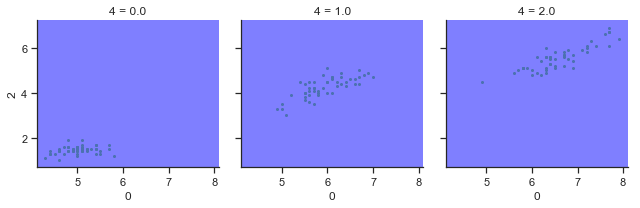

In [161]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd


data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.FacetGrid(
    iris, 
    col=4,
    subplot_kws={
        'facecolor':(0,0,1,0.5),
    }
)   
g.map(plt.scatter, 0, 2, s=2**2)   

### FacetGrid的成员函数

#### add_legend绘制主题

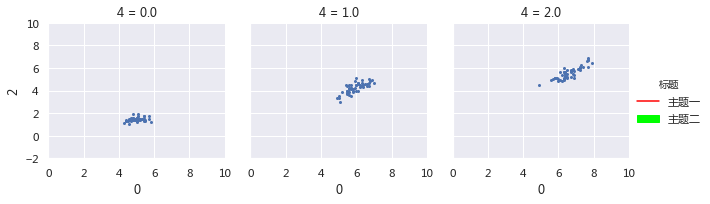

In [236]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

sns.set(font='Microsoft YaHei')   
data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.FacetGrid(
    iris, 
    col=4,
    xlim=(0,10),
    ylim=(-2, 10)
)   
g.map(plt.scatter, 0, 2, s=2**2)   

# legends = {
#     0:mpl.patches.Patch(color=(1,0,0), label='Hell'),
#     1:mpl.patches.Patch(color=(0,1,0), label='word'),
# }
legends = {
    '主题一': mpl.lines.Line2D(xdata=[0, 1], ydata=[0, 0], color=(1,0,0), label='Hell'),
    '主题二': mpl.patches.Patch(color=(0,1,0), label='word'),
}
g.add_legend(legend_data=legends, title='标题')

#### despine控制坐标轴

- 存在全局函数提供坐标轴的控制

```python
    seaborn.despine(
        fig=None, 
        ax=None, 
        top=True,     # 坐标框架的位置：上
        right=True, 
        left=False, 
        bottom=False, 
        offset=None,     # 两个坐标轴的偏离距离
        trim=False)     # 当边框没有覆盖整个数据轴的范围的时候，trim参数会限制留存的边框范围。
```

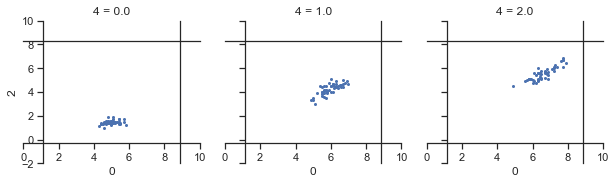

In [264]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

sns.set(font='Microsoft YaHei')   
sns.set_style("ticks")
data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.FacetGrid(
    iris, 
    col=4,
    xlim=(0,10),
    ylim=(-2, 10)
)   
g.map(plt.scatter, 0, 2, s=2**2)   

g.despine(top=False, bottom=False, right=False, left=False, offset=-20, trim=False)

#### facet_axis访问每个坐标系

- 使用ax属性与axes属性也可以访问。
    - facet_axis(row_i, col_j)
    - ax一个坐标系
    - axes在多个坐标系使用

<class 'matplotlib.axes._subplots.AxesSubplot'> (1, 3)


Text(0.5, 1.0, 'axes属性修改的标题')

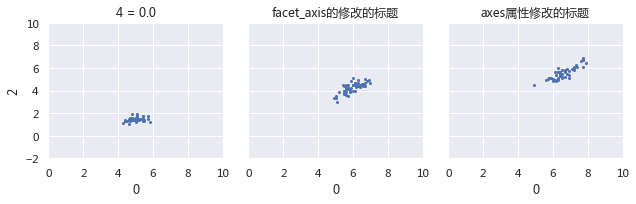

In [280]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

sns.set(font='Microsoft YaHei')   
data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target]) 

g = sns.FacetGrid(
    iris, 
    col=4,
    xlim=(0,10),
    ylim=(-2, 10)
)   

g.map(plt.scatter, 0, 2, s=2**2)

# 按照位置访问
ax2 = g.facet_axis(0, 1)
ax2.set_title('facet_axis的修改的标题')

# 获取[0,2]位置的ax
ax3 = g.axes[0,2]
print(type(ax3),g.axes.shape)
ax3.set_title('axes属性修改的标题')

# 备注：实际上还能使用fig属性访问呢Figure，这个属性在文档中没有出现，但应该想得到。

#### facet_data访问每个子集数据

- facet_data()

分组------------
(0, 0, 0) (18, 7)
分组------------
(0, 0, 1) (28, 7)
分组------------
(0, 0, 2) (1, 7)
分组------------
(0, 0, 3) (5, 7)
分组------------
(0, 1, 0) (0, 7)
分组------------
(0, 1, 1) (0, 7)
分组------------
(0, 1, 2) (31, 7)
分组------------
(0, 1, 3) (4, 7)
分组------------
(1, 0, 0) (58, 7)
分组------------
(1, 0, 1) (59, 7)
分组------------
(1, 0, 2) (0, 7)
分组------------
(1, 0, 3) (7, 7)
分组------------
(1, 1, 0) (0, 7)
分组------------
(1, 1, 1) (0, 7)
分组------------
(1, 1, 2) (30, 7)
分组------------
(1, 1, 3) (3, 7)


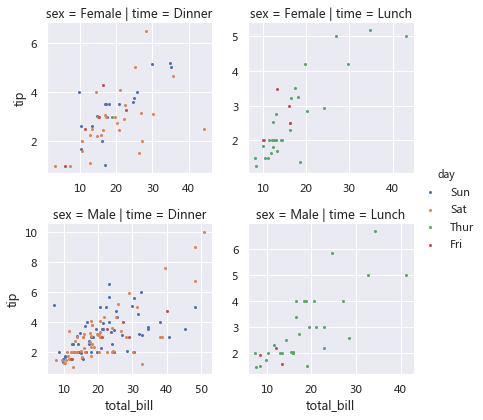

In [295]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

sns.set(font='Microsoft YaHei')   
data = pd.read_csv('tips.csv')

g = sns.FacetGrid(data, row='sex', col='time', hue='day',sharex=False,sharey=False)  
# 上面的参数解释按照sex显示2行，按照time显示4列，每个图中数据按照day显示为7中颜色
g.map(plt.scatter, 'total_bill','tip', s=2**2).add_legend()

f_data = g.facet_data()   # 生成器
# print(len(list(f_data)))
for fd in f_data:
    print('分组------------')
    print(fd[0], fd[1].shape)   # fd是元组：数据的索引（第一个）与数据（第二个）
    
# 注意下面输出的分组 sex：2种，time：2种，day：4种，总共2*2*4=16个分组

#### savefig保存为图像

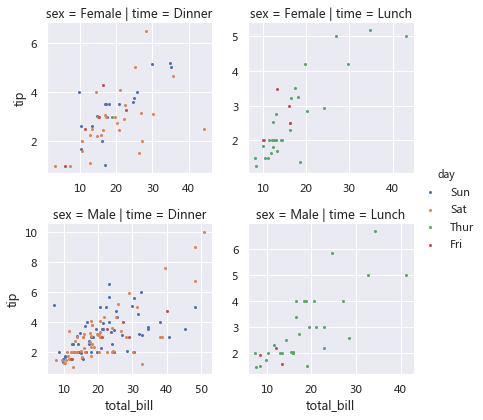

In [296]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

sns.set(font='Microsoft YaHei')   
data = pd.read_csv('tips.csv')

g = sns.FacetGrid(data, row='sex', col='time', hue='day',sharex=False,sharey=False)  
# 上面的参数解释按照sex显示2行，按照time显示4列，每个图中数据按照day显示为7中颜色
g.map(plt.scatter, 'total_bill','tip', s=2**2).add_legend()
g.savefig('fig.png',format='png')

#### set设置坐标轴标签

- 这个函数代表系列坐标轴设置函数：
    - `set(**kwargs)`：设置坐标轴属性Axes的所有属性。
    - `set_axis_labels([x_var, y_var])`：设置标签，位置在left column 与 bottom row of the grid。
    - `set_titles([template, row_template, …])`	：绘制标题。
        - 可以采用模板，模板参数如下：
        - row_var：行特征变量名字。
        - row_name：行特征变量值。
        - col_var：列特征变量名字。
        - col_name：列特征变量值。
    - `set_xlabels([label])`	设置x轴标签。
    - `set_xticklabels([labels, step])`	设置x刻度标签。
    - `set_ylabels([label])`	设置x轴标签。
    - `set_yticklabels([labels])`	设置x刻度标签。

Help on method set_xticklabels in module seaborn.axisgrid:

set_xticklabels(labels=None, step=None, **kwargs) method of seaborn.axisgrid.FacetGrid instance
    Set x axis tick labels on the bottom row of the grid.



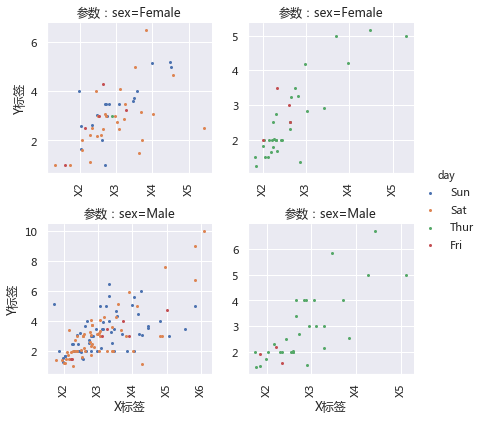

In [321]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

sns.set(font='Microsoft YaHei')   
data = pd.read_csv('tips.csv')

g = sns.FacetGrid(data, row='sex', col='time', hue='day',sharex=False,sharey=False)  
# 上面的参数解释按照sex显示2行，按照time显示4列，每个图中数据按照day显示为7中颜色
g.map(plt.scatter, 'total_bill','tip', s=2**2).add_legend()
g.set_axis_labels('X标签', 'Y标签')
# g.set(xlabel='X标签', ylabel='Y标签')    # 等价于上面的代码
g.set_titles('参数：{row_var}={row_name}') # row_var就是sex，row_name就是Female/Male
# help(g.set_titles)

g.set_xticklabels(labels=['X1','X2','X3','X4','X5','X6'],rotation=90)  # 支持其他相关参数
help(g.set_xticklabels)

## PairGrid 成对网格

- PairGrid：对数据特征两两显示关系，按指定特征，按值分类两两组合。

- PairGrid构造器定义说明：
```python
    class seaborn.PairGrid(
        data,                            # 数据
        hue=None,                    # 颜色分类显示的数据的列名
        hue_order=None, 
        palette=None, 
        hue_kws=None, 
        vars=None,                   
        x_vars=None, 
        y_vars=None, 
        diag_sharey=True, 
        height=2.5, 
        aspect=1, 
        despine=True, 
        dropna=True, 
        size=None)
```

### PairGrid的数据参数

#### vars参数

- 使用vars指定需要两两组合显示关系的特征。

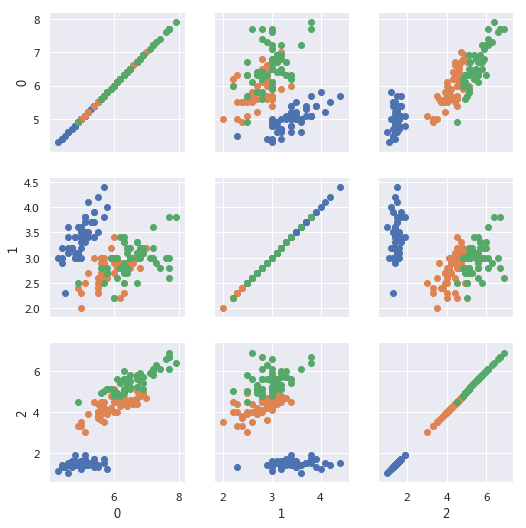

In [328]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

sns.set(font='Microsoft YaHei')   
data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.PairGrid(
    iris,
    hue=4,
    vars=[0,1,2]  # 指定特征组合，不指定默认是所有特征
)   
g.map(plt.scatter)   # 没有其他参数，只能一个参数。

#### x_vars与y_vars参数
- x_vars与y_vars与vars一样，但可以行列单独指定特征，这样的好处就不会显示特征与自己的关系。

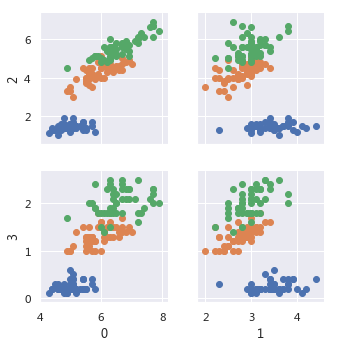

In [329]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

sns.set(font='Microsoft YaHei')   
data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.PairGrid(
    iris,
    hue=4,
    x_vars=[0, 1],
    y_vars=[2, 3] 
)   
g.map(plt.scatter)   # 没有其他参数，只能一个参数。

### PairGrid的函数

```python
    add_legend([legend_data, title, label_order])	# 绘制主题。
    map(func, **kwargs)	      # 使用一样的函数在绘制么个坐标系的图。
    map_diag(func, **kwargs)	# 使用单变量函数绘制对角线上的图；
    map_lower(func, **kwargs)	# 使用双变量函数绘制下三角的图。
    map_offdiag(func, **kwargs)	# 使用双变量函数绘制非对角的图。
    map_upper(func, **kwargs)	# 使用双变量函数绘制上三角的图。
    
    set(**kwargs)	# 设置坐标轴的属性。

```

#### map_diag 对角线函数

- 只支持一维（单变量）的绘制函数，第一个参数必须是一维图形。
- 比如plt.hist直方图，sns.kdeplot密度图等。

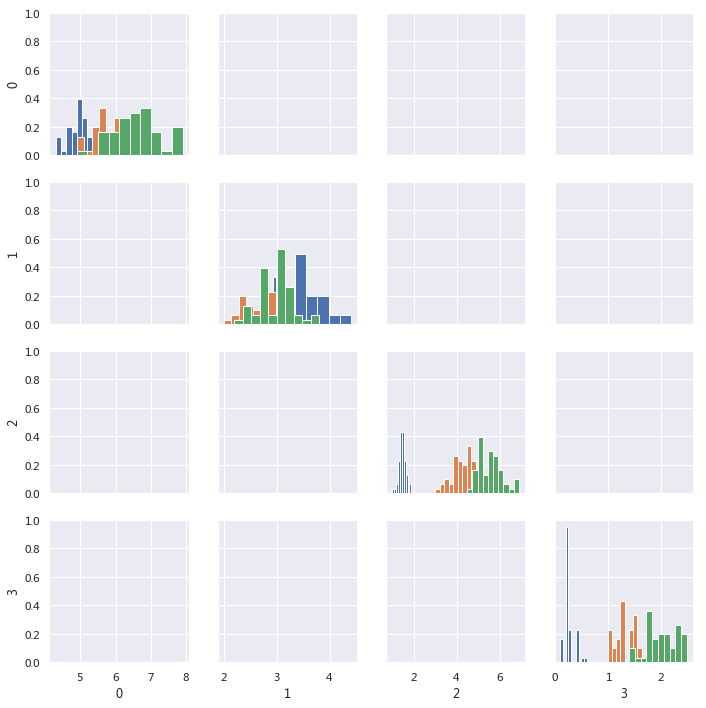

In [338]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

sns.set(font='Microsoft YaHei')   
data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.PairGrid(
    iris,
    hue=4,
    vars=[0,1,2,3]
#     x_vars=[0, 1],
#     y_vars=[2, 3] 
)   
g = g.map_diag(plt.hist)   # 对单变量数据统计，或者密度函数等

#### map_lower与map_upper与map_offdiag函数

- map_lower：下是三角函数。
- map_upper：上三角函数。
- map_offdiag：对称（除对角线）函数。

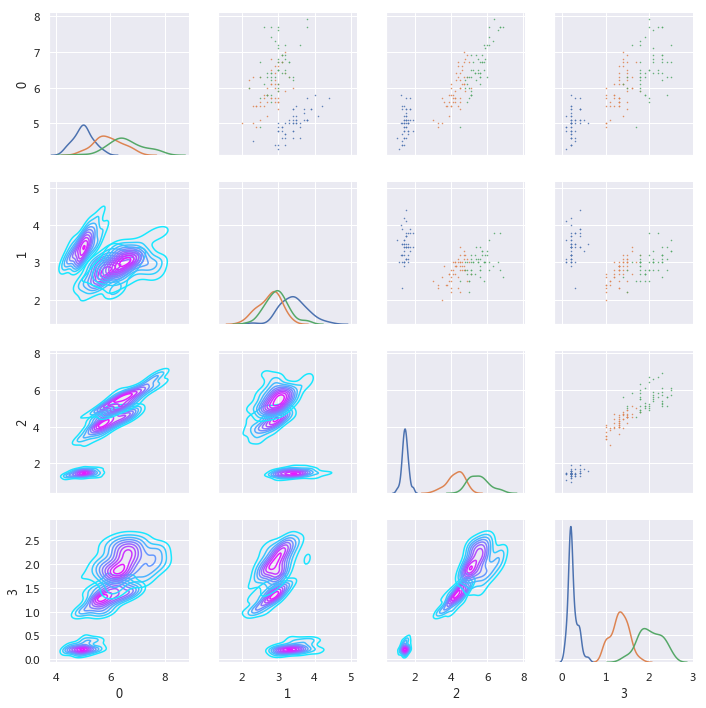

In [583]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

sns.set(font='Microsoft YaHei')   
data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.PairGrid(
    iris,
    hue=4,
    vars=[0,1,2,3]
#     x_vars=[0, 1],
#     y_vars=[2, 3] 
)   
g.map_diag(sns.kdeplot)   # 对单变量数据统计或者密度函数等
# g.map_diag(plt.plot)    # 可以自动生成整数的x坐标的。
# g.map_lower(plt.scatter) 
# g.map_upper(plt.scatter) 
# g.map_offdiag(plt.scatter )  # 等于上面两个效果
g.map_lower(sns.kdeplot, cmap="cool")
g.map_upper(plt.scatter, marker='.', s=1) 

## JointGrid 合并网格

- 绘制二元变量图，但在边界绘制单变量图。

- 类定义说明：

```python
    class seaborn.JointGrid(
        x, 
        y, 
        data=None, 
        height=6, 
        ratio=5, 
        space=0.2, 
        dropna=True, 
        xlim=None, 
        ylim=None, 
        size=None)

```

### JointGrid网格图结构

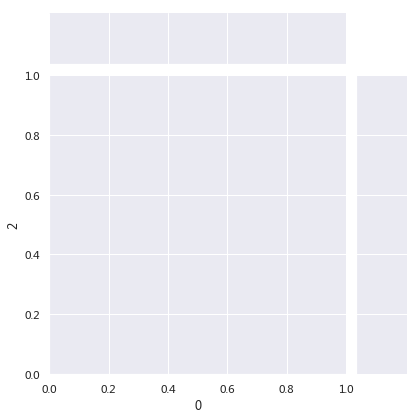

In [585]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

sns.set(font='Microsoft YaHei')   
data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.JointGrid(x=0, y=2, data=iris)   

### 图形绘制

- `annotate(func[, template, stat, loc])`：注释函数（主题函数）。
- `plot(joint_func, marginal_func[, annot_func])`：调用函数绘制图。
- `plot_joint(func, **kwargs)`：绘制中间图，func支持两个参数。
- `plot_marginals(func, **kwargs)`：边线图，分别绘制x与y的单变量图。
- `savefig(*args, **kwargs)`： 保存图形。
- `set_axis_labels([xlabel, ylabel])`：设置两个坐标轴的的标签。

#### plot绘制

```python
    JointGrid.plot(
        joint_func, # 中间图由什么函数绘制，可以是一维或者二维。
        marginal_func, # 边线图由什么函数绘制，只能是一维。
        annot_func=None # 主题由什么函数绘制
    )
```

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


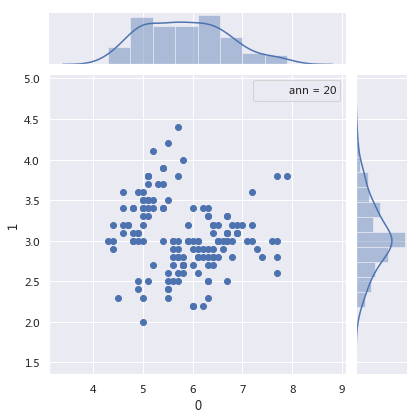

In [610]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

sns.set(font='Microsoft YaHei')   
data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.JointGrid(x=0, y=1, data=iris)   

def ann(p1, p2):
    # print(p1)   #返回x与y的数据列表
    return 20   # 需要显示的标注

# 中间图由scatter绘制，边线图由distplot绘制，主题由ann绘制
g = g.plot(plt.scatter,  sns.distplot, annot_func=ann)   # 已经不推荐使用：annot_func

#### annotate 注释/主题函数

```python
    annotate(
        func # 绘制函数
        [, template, # 模板   
          stat, # 字符，可以是latex公式
          loc # 位置
        ]
    )  
```

- 注意，还有其他与标注相关参数都可以在最后添加。
- 参数说明：
    - loc的设置：
        - best
        - upper right
        - upper left
        - lower left
        - lower right
        - right
        - center left
        - center right
        - lower center
        - upper center
        - center

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


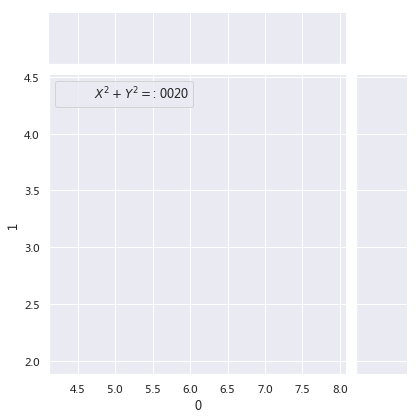

In [623]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

sns.set(font='Microsoft YaHei')   
data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.JointGrid(x=0, y=1, data=iris)   

def ann(p1, p2):
    # print(p1)   #返回x与y的数据列表
    return 20   # 需要显示的标注

g = g.annotate(ann, template='{stat}: {val:04d}', stat='$X^2 + Y^2=$', loc='upper left', fontsize=12)  # 不推荐使用

#### plot_joint 中间图的绘制函数

- `plot_joint(func, **kwargs)`：绘制中间图，一维/二维图。

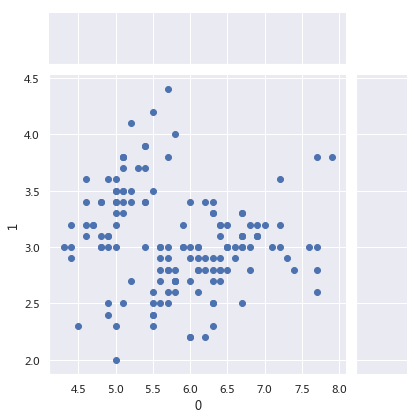

In [625]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

sns.set(font='Microsoft YaHei')   
data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.JointGrid(x=0, y=1, data=iris)   

def ann(p1, p2):
    # print(p1)   #返回x与y的数据列表
    return 20   # 需要显示的标注

g.plot_joint(plt.scatter)

#### plot_marginals 边线图的绘制

- 绘制边界上的单元变量图
    - `JointGrid.plot_marginals(func, **kwargs)`

- 参数说明：
    - func函数（只能是一维）
        - 第一个参数用来接收绘制的数组数据；
        - 第二个参数用来指定方向，参数名必须是vertical。
        - 满足这个条件的不多，一般都在seaborn中存在。

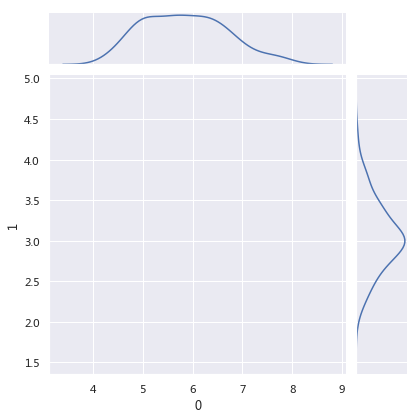

In [627]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

sns.set(font='Microsoft YaHei')   
data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.JointGrid(x=0, y=1, data=iris)   

def ann(p1, p2):
    # print(p1)   #返回x与y的数据列表
    return 20   # 需要显示的标注

g.plot_marginals(sns.kdeplot)

# Seaborn图形-关系图

- 关系统计图提供三个函数实现：
    - `relplot([x, y, hue, size, style, data, row, …])`	
        - Figure级接口，绘制在FacetGrid上。
        - 绘制关系。
    - `scatterplot([x, y, hue, style, size, data, …])`	
        - 绘制一个可能有几个语义分组的散点图。
    - `lineplot([x, y, hue, size, style, data, …])`
        - 画一个可能有几个语义分组的线图。
        
        
- `scatterplot`和`lineplot`是`relplot`的特例。

## relplot绘制函数

- 函数定义说明：

```python
    seaborn.relplot(
        x=None, 
        y=None, 
        hue=None, 
        size=None, # 点的大小。
        style=None, # 点的样式。
        data=None, 
        row=None, 
        col=None, 
        col_wrap=None, 
        row_order=None, 
        col_order=None, 
        palette=None, 
        hue_order=None, 
        hue_norm=None, 
        sizes=None,  # 配合size指定大小。
        size_order=None, 
        size_norm=None, 
        markers=None, # 配合style指定形状。
        dashes=None, # 配合style指定线宽度（点就是marker）。
        style_order=None, 
        legend='brief', 
        kind='scatter', # 包含scatter与lin两个特例。      
        height=5, 
        aspect=1, 
        facet_kws=None, 
        **kwargs)
```

### x,y与data参数

- 绘制data中x与y的关系
    - x,y必须是数值型。

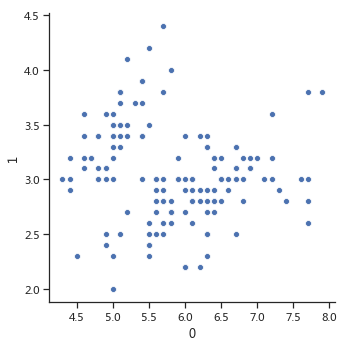

In [392]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd


sns.set(style="ticks", font='Microsoft YaHei')

data,target= ds.load_iris(return_X_y=True)
iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4
g = sns.relplot(x=0, y=1, data=iris)

### kind参数与line的意义

- scatter散点坐标关系，默认是scatter。
- line曲线关系
    -  阴影部分是由于纵坐标上多个值导致的, 取值为均值, 阴影部分是置信区间（95%作为通用的置信概率）
    -  阴影部分的面积使用置信区间参数控制ci, ci取值0-100表示置信度（置信概率）
    -  异常点不在阴影范围内（异常点的检测方式应该在线箱图概念中一样）。
    -  ci参数在文档中没有说明。

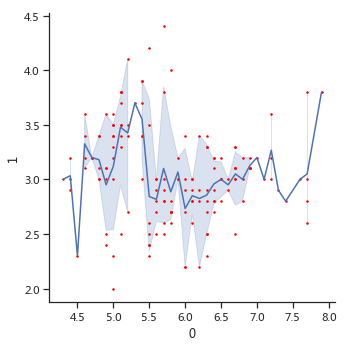

In [405]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd


sns.set(style="ticks", font='Microsoft YaHei')

data,target= ds.load_iris(return_X_y=True)
iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4

# 返回的是FacetGrid
g = sns.relplot(x=0, y=1, data=iris, kind='line', ci=100)

# 可以在其基础上再绘制
g.map(plt.scatter,0,1, color=(1, 0, 0, 1), s=3**2, marker= '.')

### 分组变量参数hue,size,style

- 这三个参数用来指定数据集中的列名来分组，分组的数据使用不同的方式显示：
    - hue：使用颜色区分显示不同的组；
    - size：使用大小区分显示不同的组；
    - style：使用样式区分显示不同的组；（比如marker样式等）

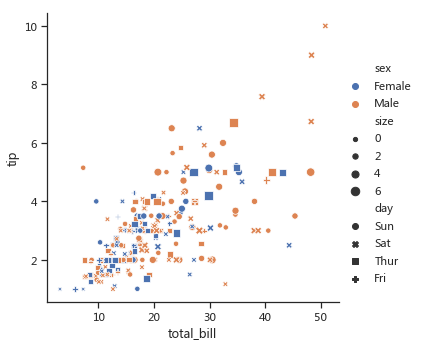

In [422]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

sns.set(style="ticks", font='Microsoft YaHei')

data = pd.read_csv('tips.csv')

# x：账单数，y：小费，hue：性别，size：人数，style：星期几
g = sns.relplot(x='total_bill', y='tip', hue='sex', size='size', style='day', data=data, kind='scatter')

### hue,size是字母与数值

- 使用hue与size指定的列的数据可以是字母与数值
    - 字母：
        - 按照其值的种数分类。
    - 数值:
        - hue：指定字段，按颜色区分值。可以通过palette改变配色。
        - 连续值：颜色是连续变化。离散型：对应调色板的颜色，先两边颜色，然后是中间色。
        - size：点的大小，size的数值类型必须是整数，小数就无效。

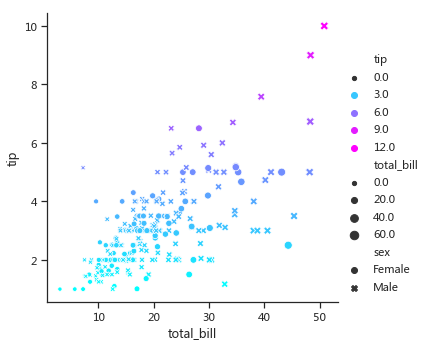

In [447]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

sns.set(style="ticks", font='Microsoft YaHei')

data = pd.read_csv('tips.csv')

g = sns.relplot(x='total_bill', y='tip',hue='tip',size='total_bill',style='sex',data=data, kind='scatter',palette='cool')

### hue,size作为列表

- hue,size,style参数可以使用列表指定对应行的颜色，大小与样式

- hue,size本身还可以是数值。

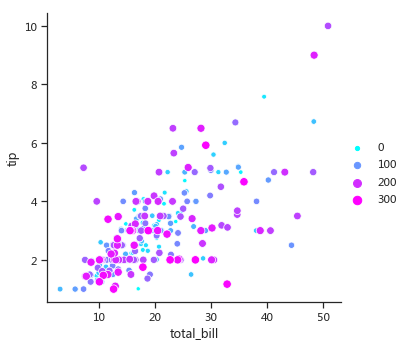

In [443]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

sns.set(style="ticks", font='Microsoft YaHei')

data = pd.read_csv('tips.csv')
# 字段： otal_bill	tip	sex	smoker	day	time	size

# 数据行数为244，hue和size必须和x、y一样长
g = sns.relplot(x='total_bill', y='tip', hue=range(244), size=range(244), data=data,  kind='scatter',palette='cool')

# style.tolist()

### hue_norm与size_norm参数

- hue_norm与size_norm：
    - 规范化范围，也可以使用函数来转换。
    - 比如hue_norm=(0,50) hue规范化就是值都除以（50-0）。
    - 或者使用规范化对象，比如对数转换对象（一种可调用对象）。
        - 可以直接实现，也可以调用matplotlib中已经实现好的函数。

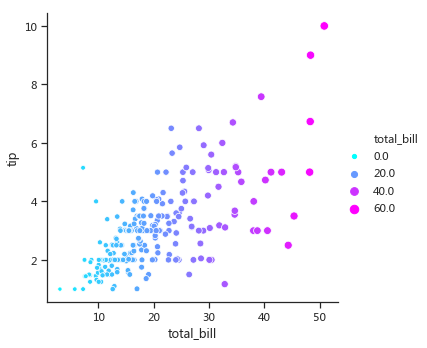

In [458]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd

sns.set(style="ticks", font='Microsoft YaHei')

data = pd.read_csv('tips.csv')

# 字段： otal_bill	tip	sex	smoker	day	time	size
g = sns.relplot(x='total_bill', y='tip', hue='total_bill', size='total_bill', 
                hue_norm=(0, 50),   # 0-50之间线性同比缩小
                data=data,  kind='scatter',palette='cool')

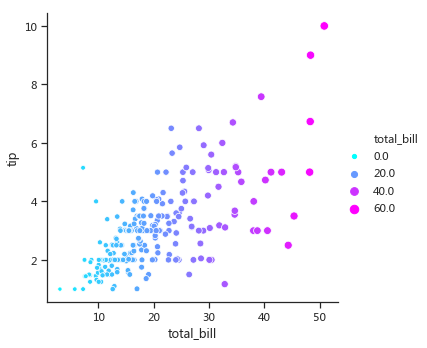

In [492]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize

sns.set(style="ticks", font='Microsoft YaHei')

data = pd.read_csv('tips.csv')

# 使用自定义函数规范化
class  log_norm(Normalize):    # 其实就是0-1标准规范化实现。
    def __call__(self, v):
        if isinstance(v, np.float64):
            return  v / (self.vmax - self.vmin) 
        else:
            return np.array(v) / (self.vmax - self.vmin) 

# 字段： otal_bill	tip	sex	smoker	day	time	size
g = sns.relplot(x='total_bill', y='tip', hue='total_bill', size='total_bill', 
                hue_norm=log_norm(0, 50),   # 0-50之间线性同比缩小
                data=data,  kind='scatter',palette='cool')

### sizes参数

- 用来指定每个分类的值对应的显示的大小, 类型是：
    -  list, dict, or tuple,

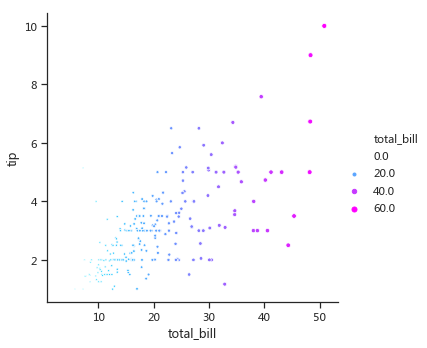

In [507]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize

sns.set(style="ticks", font='Microsoft YaHei')

data = pd.read_csv('tips.csv')

# 字段： otal_bill	tip	sex	smoker	day	time	size
g = sns.relplot(x='total_bill', y='tip', hue='total_bill', 
                size='total_bill', sizes=(0, 5**2),   # 指定size值大小在0~5之间
                data=data,  kind='scatter',palette='cool')

- size是分类的时候，使用列表与字典
    

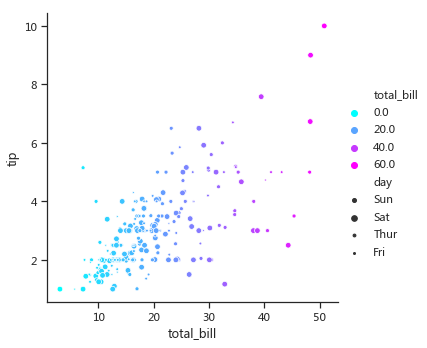

In [515]:
# row
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize

sns.set(style="ticks", font='Microsoft YaHei')

data = pd.read_csv('tips.csv')


# 字段： otal_bill	tip	sex	smoker	day	time	size
g = sns.relplot(x='total_bill', y='tip', hue='total_bill', 
                size='day', 
                sizes={'Fri':2**2, 'Thur':2**3, 'Sun':2**4, 'Sat':2**5},
                # sizes=[2**2, 4**2,8**2, 16**2],   # day的4个值对应的大小
                data=data,  kind='scatter',palette='cool')

## scatterplot散点图

```python
    seaborn.scatterplot(
        x=None, 
        y=None, 
        hue=None, 
        style=None, 
        size=None, 
        data=None, 
        palette=None, 
        hue_order=None, 
        hue_norm=None, 
        sizes=None, 
        size_order=None, 
        size_norm=None, 
        markers=True, # 用来指定marker样式，类型：boolean, list, or dictionary, optional
        style_order=None, 
        x_bins=None, # 当前没有实现
        y_bins=None, 
        units=None, # 没有实现
        estimator=None,  # 分组数据的聚合方式（估计量）,对散点没有实现
        ci=95, # 置信度 或者指定使用标准方差 int or “sd” ，对散点没有实现
        n_boot=1000, # 计算置信度的采样次数。采用bootstraps采样：有放回采样
        alpha='auto',   # 点的透明度 
        x_jitter=None,       
        y_jitter=None, 
        legend='brief',  # 主题的绘制方式“brief”, “full”, or False
        ax=None,  # 绘制到指定的坐标轴
        **kwargs)

```

- 其中data用来指定数据源；

- markers参数

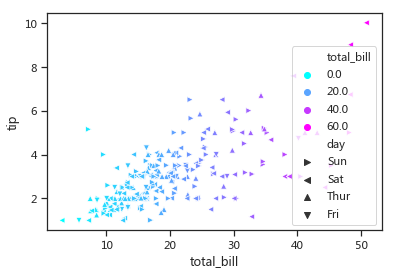

In [518]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize

sns.set(style="ticks", font='Microsoft YaHei')

data = pd.read_csv('tips.csv')


# 字段： otal_bill	tip	sex	smoker	day	time	size
# g = sns.relplot(x='total_bill', y='tip', hue='total_bill', style='day', markers=['>','<','^','v'],
#                 data=data,  kind='scatter',palette='cool')  

g = sns.scatterplot(x='total_bill', y='tip', hue='total_bill', style='day', markers=['>','<','^','v'],
                data=data,palette='cool')    # 与上面一样。

## lineplot线段图

```python
    seaborn.lineplot(
        x=None, 
        y=None, 
        hue=None, 
        size=None, 
        style=None, 
        data=None, 
        palette=None, 
        hue_order=None, 
        hue_norm=None, 
        sizes=None, 
        size_order=None, 
        size_norm=None, 
        dashes=True,  # 线条样式：boolean, list, or dictionary, optional
        markers=None, # 点的样式
        style_order=None, 
        units=None,   # 单位
        estimator='mean',  # 聚合方法
        ci=95, # 置信概率
        n_boot=1000,  # 采样次数，使用bootstrap采样方法
        sort=True,  # 绘制的线段的点是否按照x排序。
        err_style='band', # 置信区间样式。band：半透明误差带。bars：离散误差条。
        err_kws=None, # err绘制的参数：err_band : dict of keyword arguments
        legend='brief', 
        ax=None, **kwargs)
```

### estimator参数与ci参数

- 举例简介：
    - 某个上市公司3年的开盘价格的数据分析。
    - tushare得到的数据是按天的。
    - 处理数据，使其按照月分析：月的取值（均值），最大值、最小值。


- 采样数与置信概率的设置：
    - `estimator`：评估方法。
        - 可以指定mean、max、min、std等，也可以是自己写的评估函数。
    - `ci`：置信度/置信概率。
        - 决定了置信区间，其值越大，置信区间越大。
        - ci=95：95%的置信区间。ci=0：0%置信区间，就是折线本身，折线阴影宽度为0。

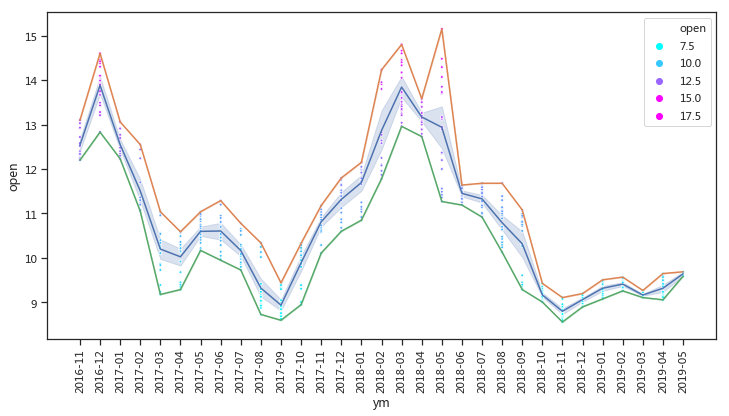

In [13]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="ticks", font='Microsoft YaHei')

data = ts.get_hist_data('000001') #一次性获取全部日k线数年月日

# 数据处理，把索引日期，按照指定格式取出来
dt = pd.to_datetime(data.index, format='%Y-%m-%d')
# 把年、月添加到新字段中
data['ym'] = dt.strftime('%Y-%m')

# 每个月open平均值折线图
ax = sns.lineplot(x='ym', y='open', data=data, n_boot=10000,ci=95, sort=False) # 返回的是Axes对象，和relplot不一样
# 每个月open值散点图，用颜色区分
sns.scatterplot(x='ym',y='open', hue='open', data=data, ax=ax, s=2**3, palette='cool', markers='o')# 同上
# 每个月open最大值折线图
sns.lineplot(x='ym',y='open', data=data, ax=ax,estimator='max', ci=0, sort=False)
# 每个月open最小值折线图
sns.lineplot(x='ym',y='open', data=data, ax=ax,estimator='min',  ci=0, sort=False)

# 按照ym分组
g_data = data.groupby('ym').sum()
# 取出分组的索引，作为新的ym
g_data['ym'] = g_data.index

# 设置图的标签，值旋转90度显示
ax.set_xticklabels(labels=g_data['ym'], rotation=90) 

# 设置图的大小
ax.figure.set_size_inches(12,6)

plt.show()

### err_style与err_band参数

- err_style 置信区间样式：
    - band: 半透明误差带，默认值。
    - bars：离散误差条。
- err_band
    - 与err_style有关的参数包含：
        - ax.fill_between 
        - ax.errorbar

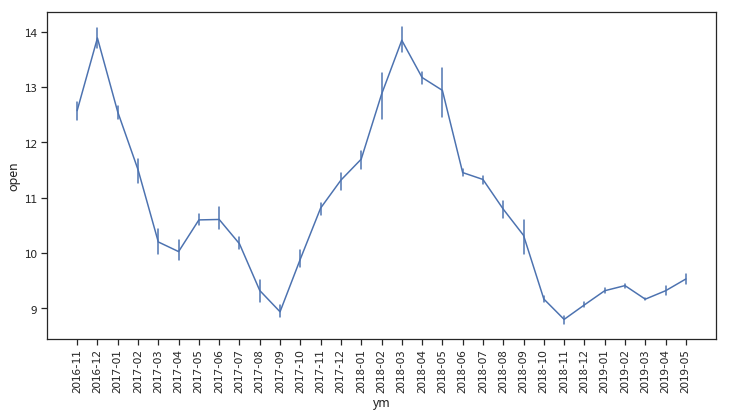

In [656]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="ticks", font='Microsoft YaHei')

data = ts.get_hist_data('000001') #一次性获取全部日k线数年月日
dt = pd.to_datetime(data.index, format='%Y-%m-%d')
data['ym'] = dt.strftime('%Y-%m')

# 数据预处理
ax = sns.lineplot(x='ym', y='open', data=data,n_boot=100,ci=95, err_style='bars', sort=False)

g_data = data.groupby('ym').sum()
g_data['ym'] = g_data.index

ax.set_xticklabels(labels=g_data['ym'], rotation=90) 
ax.figure.set_size_inches(12,6)

# Seaborn图形-分类图

- Seaborn提供的分类图有：

```python
    catplot([x, y, hue, data, row, col, …])	
        # 绘制分类图到FacetGrid。下面的都是这个函数的特列，使用kind指定不同类型
    stripplot([x, y, hue, data, order, …])	
        # 绘制的散点图中有一个数据是类别变量。
    swarmplot([x, y, hue, data, order, …])	
        # 绘制点不重叠的分类散点图。
    boxplot([x, y, hue, data, order, hue_order, …])	
        # 绘制与类别分布有关的方框图。
    violinplot([x, y, hue, data, order, …])	
        # 绘制箱线图和核密度估计图结合的图。
    boxenplot([x, y, hue, data, order, …])	
        # 为容量较大数据集的绘制方框图，有所增强。
    pointplot([x, y, hue, data, order, …])	
        # 绘制散点图，使用散点图的符号显示点估计和置信区间。
    barplot([x, y, hue, data, order, hue_order, …])	
        # 绘制柱状图，将点估计和置信区间显示为矩形柱状条。
    countplot([x, y, hue, data, order, …])	
        # 绘制柱状图，其中的柱状表示每个分类箱中的观察计数

```

- catplot函数的使用分成很多类型
    - 返回的是FacetGrid对象


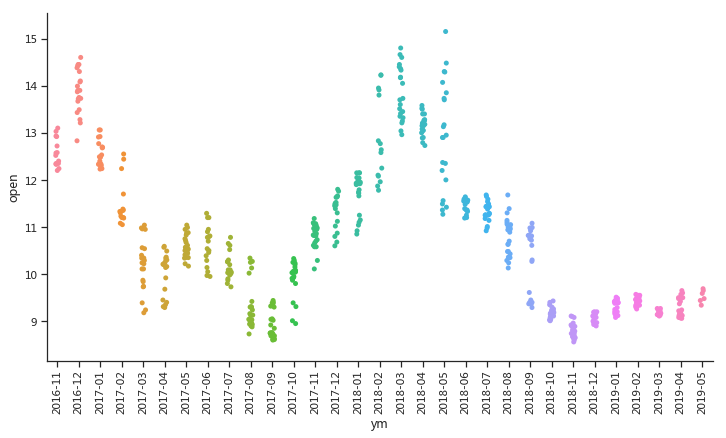

In [650]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="ticks", font='Microsoft YaHei')

data = ts.get_hist_data('000001') #一次性获取全部日k线数年月日
# 数据预处理
data['date'] = data.index
dt = pd.to_datetime(data.index, format='%Y-%m-%d')
data['ym'] = dt.strftime('%Y-%m')

g = sns.catplot(x='ym',y='open',data=data)

g_data = data.groupby('ym').sum()
g_data['ym'] = g_data.index
g.ax.set_xticklabels(labels=g_data['ym'], rotation=90) 
g.fig.set_size_inches(12,6)

# data

## stripplot单变量抖动散点图

- jitter：控制抖动，防止某些点重叠在一起。

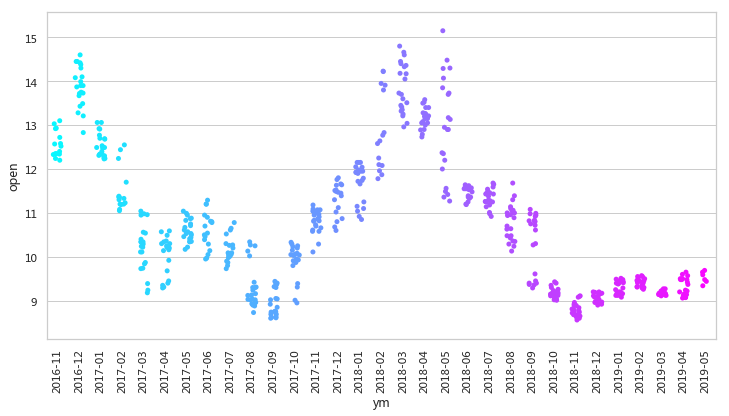

In [700]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="whitegrid", font='Microsoft YaHei')


data = ts.get_hist_data('000001') #一次性获取全部日k线数年月日
# 数据预处理
data['date'] = data.index
dt = pd.to_datetime(data.index, format='%Y-%m-%d')
data['ym'] = dt.strftime('%Y-%m')

g = sns.stripplot(
    x='ym', 
    y='open', 
    # hue='ym',
    data=data, 
    palette='cool',
    jitter=0.2, 
    # linewidth=1, 
    # edgecolor=(1,0,0,1),
    dodge=True
)  # jitter控制振动方法
# g = sns.stripplot(x='ym', y='open', hue='ym', data=data, palette='cool',jitter=0.2)  # jitter控制振动方法

g_data = data.groupby('ym').sum()
g_data['ym'] = g_data.index
g.set_xticklabels(labels=g_data['ym'], rotation=90) 


g.figure.set_size_inches(12,6)

# data

## swarmplot不重叠散点图


- 与stripplot类似，但对重叠点进行处理。处理方式不是抖动。

- 函数定义
```python
    seaborn.swarmplot(
        x=None, 
        y=None, 
        hue=None, 
        data=None, 
        order=None, 
        hue_order=None, 
        dodge=False, 
        orient=None, 
        color=None, 
        palette=None, 
        size=5, 
        edgecolor='gray', 
        linewidth=0, 
        ax=None, 
        **kwargs)
```

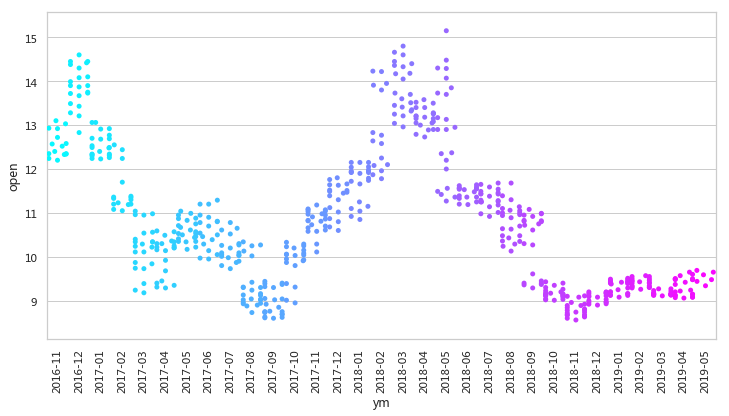

In [702]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="whitegrid", font='Microsoft YaHei')


data = ts.get_hist_data('000001') #一次性获取全部日k线数年月日
# 数据预处理
data['date'] = data.index
dt = pd.to_datetime(data.index, format='%Y-%m-%d')
data['ym'] = dt.strftime('%Y-%m')

g = sns.swarmplot(
    x='ym', 
    y='open', 
    # hue='ym',
    data=data, 
    palette='cool',
    # linewidth=1, 
    # edgecolor=(1,0,0,1),
    dodge=True
)  # jitter控制振动方法
# g = sns.stripplot(x='ym', y='open', hue='ym', data=data, palette='cool',jitter=0.2)  # jitter控制振动方法

g_data = data.groupby('ym').sum()
g_data['ym'] = g_data.index
g.set_xticklabels(labels=g_data['ym'], rotation=90) 


g.figure.set_size_inches(12,6)

# data

## boxplot分类箱线统计图

- 函数定义说明

```python
    seaborn.boxplot(
        x=None, 
        y=None, 
        hue=None, 
        data=None, 
        order=None, 
        hue_order=None, 
        orient=None, 
        color=None, 
        palette=None, 
        saturation=0.75, # 饱和度
        width=0.8, 
        dodge=True, 
        fliersize=5, 
        linewidth=None, 
        whis=1.5, 
        notch=False, 
        ax=None, 
        **kwargs)

```

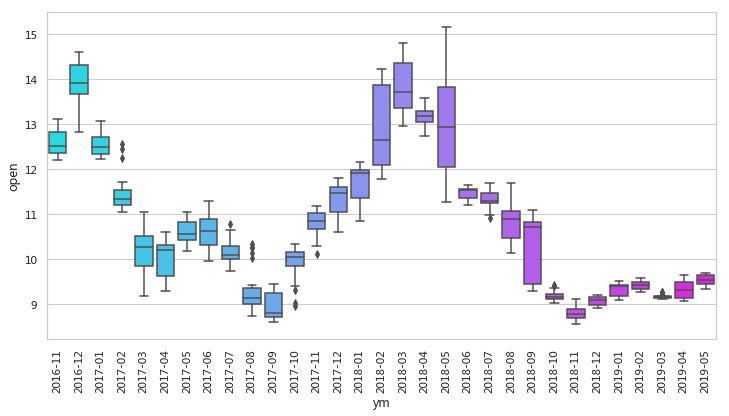

In [703]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="whitegrid", font='Microsoft YaHei')


data = ts.get_hist_data('000001') #一次性获取全部日k线数年月日
# 数据预处理
data['date'] = data.index
dt = pd.to_datetime(data.index, format='%Y-%m-%d')
data['ym'] = dt.strftime('%Y-%m')

g = sns.boxplot(
    x='ym', 
    y='open', 
    # hue='ym',
    data=data, 
    palette='cool',
    # linewidth=1, 
    # edgecolor=(1,0,0,1),
    dodge=True
)  # jitter控制振动方法
# g = sns.stripplot(x='ym', y='open', hue='ym', data=data, palette='cool',jitter=0.2)  # jitter控制振动方法

g_data = data.groupby('ym').sum()
g_data['ym'] = g_data.index
g.set_xticklabels(labels=g_data['ym'], rotation=90) 


g.figure.set_size_inches(12,6)

# data

## violinplot箱线与核密度估计图

- 函数定义说明

```python

    seaborn.violinplot(
        x=None, 
        y=None, 
        hue=None, 
        data=None, 
        order=None, 
        hue_order=None, 
        bw='scott', 
        cut=2, 
        scale='area', 
        scale_hue=True, 
        gridsize=100, 
        width=0.8, 
        inner='box', 
        split=False, 
        dodge=True, 
        orient=None, 
        linewidth=None, 
        color=None, 
        palette=None, 
        saturation=0.75, 
        ax=None, 
        **kwargs)

```

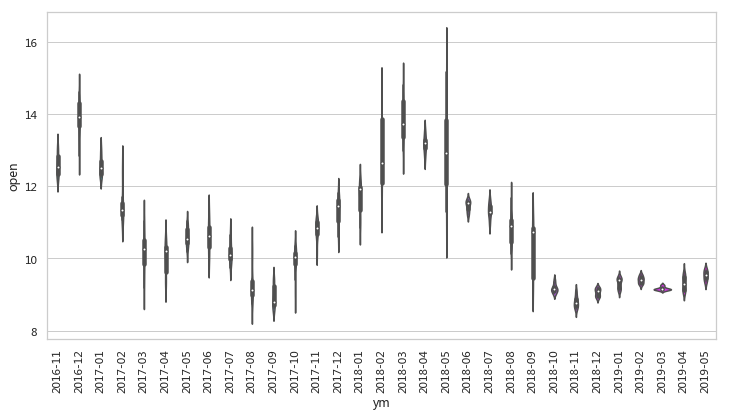

In [706]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="whitegrid", font='Microsoft YaHei')


data = ts.get_hist_data('000001') #一次性获取全部日k线数年月日
# 数据预处理
data['date'] = data.index
dt = pd.to_datetime(data.index, format='%Y-%m-%d')
data['ym'] = dt.strftime('%Y-%m')

g = sns.violinplot(
    x='ym', 
    y='open', 
    # hue='ym',
    data=data, 
    palette='cool',
    # linewidth=1, 
    # edgecolor=(1,0,0,1),
    dodge=True
)  # jitter控制振动方法
# g = sns.stripplot(x='ym', y='open', hue='ym', data=data, palette='cool',jitter=0.2)  # jitter控制振动方法

g_data = data.groupby('ym').sum()
g_data['ym'] = g_data.index
g.set_xticklabels(labels=g_data['ym'], rotation=90) 


g.figure.set_size_inches(12,6)

# data

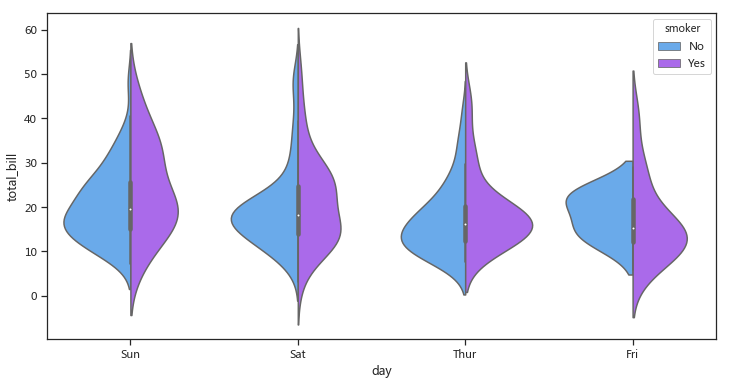

In [712]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize

sns.set(style="ticks", font='Microsoft YaHei')

data = pd.read_csv('tips.csv')

# 中间是箱线图，两边是密度图
g = sns.violinplot(
    x="day", 
    y="total_bill", 
    hue="smoker",
    data=data,
    palette='cool',
    # linewidth=1, 
    # edgecolor=(1,0,0,1),
    dodge=True,
    split=True
)  

g.figure.set_size_inches(12,6)

## boxenplot大样本箱线图

- 特点：在箱线图基础上，使用粗细表示数量，体现了样本数量的细节。


- 函数说明：
```python
    seaborn.boxenplot(
        x=None, 
        y=None, 
        hue=None, 
        data=None, 
        order=None, 
        hue_order=None, 
        orient=None, 
        color=None, 
        palette=None, 
        saturation=0.75, 
        width=0.8, 
        dodge=True, 
        k_depth='proportion', 
        linewidth=None, 
        scale='exponential', 
        outlier_prop=None, 
        ax=None, 
        **kwargs)
```

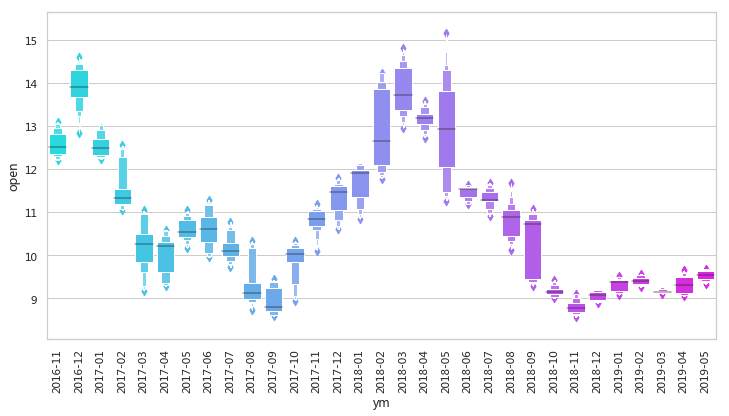

In [713]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="whitegrid", font='Microsoft YaHei')


data = ts.get_hist_data('000001') #一次性获取全部日k线数年月日
# 数据预处理
data['date'] = data.index
dt = pd.to_datetime(data.index, format='%Y-%m-%d')
data['ym'] = dt.strftime('%Y-%m')

g = sns.boxenplot(
    x='ym', 
    y='open', 
    # hue='ym',
    data=data, 
    palette='cool',
    # linewidth=1, 
    # edgecolor=(1,0,0,1),
    dodge=True
)  # jitter控制振动方法
# g = sns.stripplot(x='ym', y='open', hue='ym', data=data, palette='cool',jitter=0.2)  # jitter控制振动方法

g_data = data.groupby('ym').sum()
g_data['ym'] = g_data.index
g.set_xticklabels(labels=g_data['ym'], rotation=90) 


g.figure.set_size_inches(12,6)

# data

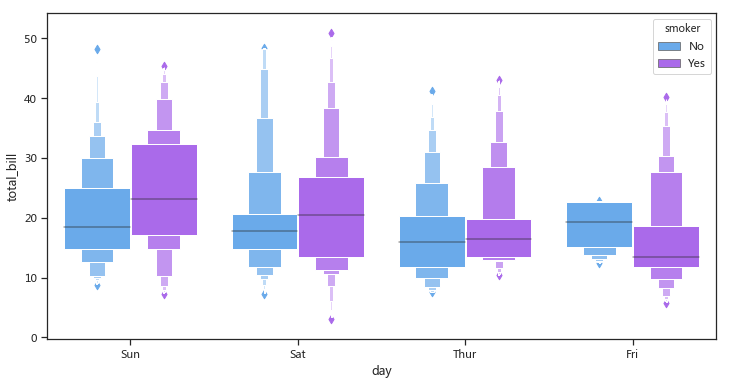

In [715]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize

sns.set(style="ticks", font='Microsoft YaHei')

data = pd.read_csv('tips.csv')

g = sns.boxenplot(
    x="day", 
    y="total_bill", 
    hue="smoker",
    data=data,
    palette='cool',
    # linewidth=1, 
    # edgecolor=(1,0,0,1),
    dodge=True
)  

g.figure.set_size_inches(12,6)

## pointplot 估计与置信区间点图

- 类似箱线图，但使用点替代。


- 函数定义说明：
```python
    seaborn.pointplot(
        x=None, 
        y=None, 
        hue=None, 
        data=None, 
        order=None, 
        hue_order=None, 
        estimator=<function mean>, 
        ci=95, 
        n_boot=1000, 
        units=None, 
        markers='o', 
        linestyles='-', 
        dodge=False, 
        join=True, 
        scale=1, 
        orient=None, 
        color=None, 
        palette=None, 
        errwidth=None, 
        capsize=None, 
        ax=None, 
        **kwargs)
```

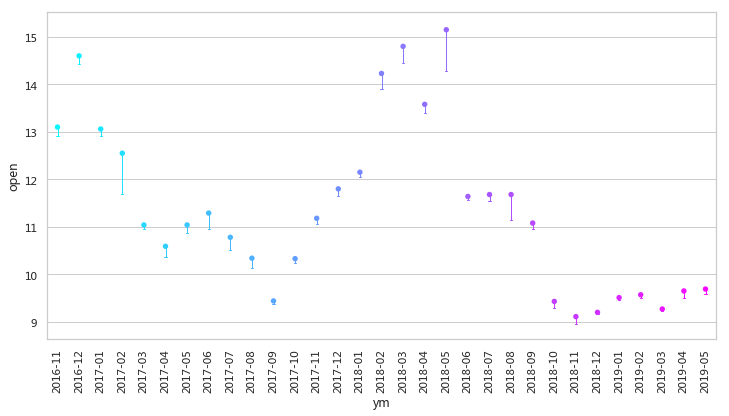

In [726]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="whitegrid", font='Microsoft YaHei')


data = ts.get_hist_data('000001') #一次性获取全部日k线数年月日
# 数据预处理
data['date'] = data.index
dt = pd.to_datetime(data.index, format='%Y-%m-%d')
data['ym'] = dt.strftime('%Y-%m')

g = sns.pointplot(
    x='ym', 
    y='open', 
    # hue='ym',
    data=data, 
    palette='cool',
    markers='.',
    capsize=0.1,   # 端点大小
    errwidth=1,      # 错误线粗细
    estimator=np.max,     # 统计函数   np.std等函数
    # linewidth=1, 
    # edgecolor=(1,0,0,1),
    dodge=True
)  # jitter控制振动方法
# g = sns.stripplot(x='ym', y='open', hue='ym', data=data, palette='cool',jitter=0.2)  # jitter控制振动方法

g_data = data.groupby('ym').sum()
g_data['ym'] = g_data.index
g.set_xticklabels(labels=g_data['ym'], rotation=90) 


g.figure.set_size_inches(12,6)

# data

## barplot 估计与置信区间柱状图

- 函数说明：
```python
    seaborn.barplot(
        x=None, 
        y=None, 
        hue=None, 
        data=None, 
        order=None, 
        hue_order=None, 
        estimator=<function mean>, 
        ci=95, 
        n_boot=1000, 
        units=None, 
        orient=None, 
        color=None, 
        palette=None, 
        saturation=0.75, 
        errcolor='.26', 
        errwidth=None, 
        capsize=None, 
        dodge=True, 
        ax=None, 
        **kwargs)
```

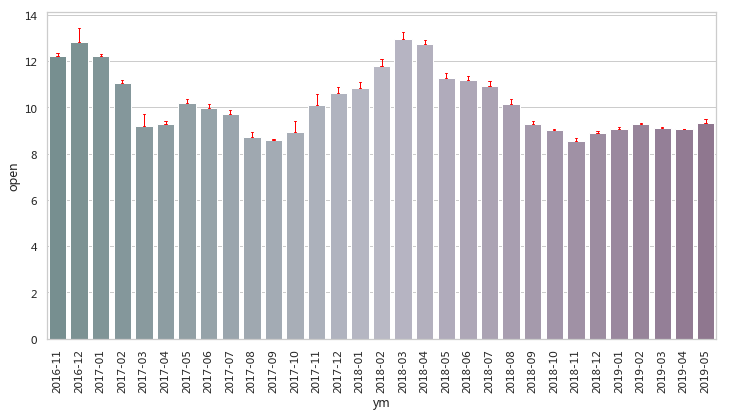

In [734]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="whitegrid", font='Microsoft YaHei')


data = ts.get_hist_data('000001') #一次性获取全部日k线数年月日
# 数据预处理
data['date'] = data.index
dt = pd.to_datetime(data.index, format='%Y-%m-%d')
data['ym'] = dt.strftime('%Y-%m')

g = sns.barplot(
    x='ym', 
    y='open', 
    # hue='ym',
    data=data, 
    palette='cool',
    capsize=0.1,   # 端点大小
    errwidth=1,      # 错误线粗细
    errcolor=(1,0,0,1),  # 误差颜色
    saturation=0.1,   # 颜色饱和度
    estimator=np.min,     # 统计函数   np.std等函数
    # linewidth=1, 
    # edgecolor=(1,0,0,1),
    dodge=True
)  # jitter控制振动方法
# g = sns.stripplot(x='ym', y='open', hue='ym', data=data, palette='cool',jitter=0.2)  # jitter控制振动方法

g_data = data.groupby('ym').sum()
g_data['ym'] = g_data.index
g.set_xticklabels(labels=g_data['ym'], rotation=90) 


g.figure.set_size_inches(12,6)

# data

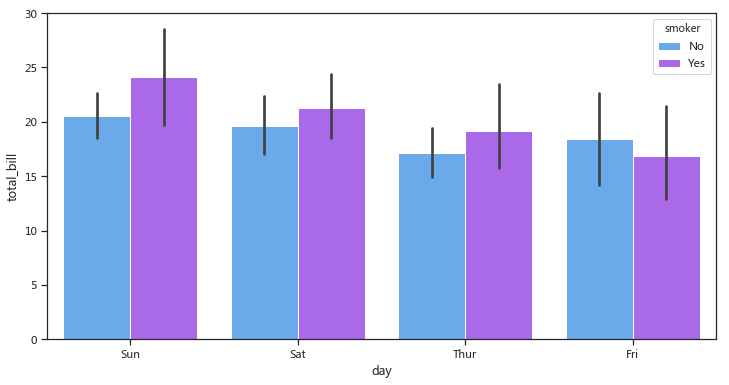

In [730]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize

sns.set(style="ticks", font='Microsoft YaHei')

data = pd.read_csv('tips.csv')

g = sns.barplot(
    x="day", 
    y="total_bill", 
    hue="smoker",
    data=data,
    palette='cool',
    # linewidth=1, 
    # edgecolor=(1,0,0,1),
    dodge=True
)  

g.figure.set_size_inches(12,6)

## countplot分类直方图

- 函数说明：
```python
    seaborn.countplot(
        x=None, 
        y=None, 
        hue=None, 
        data=None, 
        order=None, 
        hue_order=None, 
        orient=None, 
        color=None, 
        palette=None, 
        saturation=0.75, 
        dodge=True, 
        ax=None, 
        **kwargs)
```

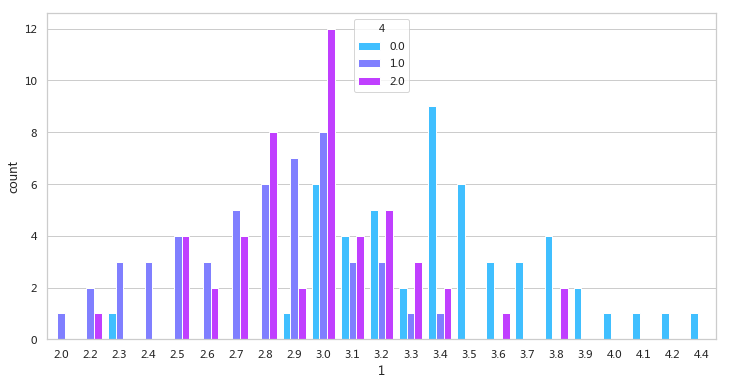

In [744]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="whitegrid", font='Microsoft YaHei')


data,target= ds.load_iris(return_X_y=True)
iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4

g = sns.countplot(
    x=1, 
    hue=4,    # 分类显示直方图
    data=iris, 
    palette='cool',
    capsize=0.1,   # 端点大小
    saturation=1,   # 颜色饱和度
    dodge=True
)  # jitter控制振动方法
# g = sns.stripplot(x='ym', y='open', hue='ym', data=data, palette='cool',jitter=0.2)  # jitter控制振动方法



g.figure.set_size_inches(12,6)

# data

# Seaborn图形-分布图

```python

    jointplot(x, y[, data, kind, stat_func, …])	
        # 一元变量与二元变量图合并绘制二元图。
    pairplot(data[, hue, hue_order, palette, …])	
        # 数据集中两两关系图。
    distplot(a[, bins, hist, kde, rug, fit, …])	
        # 单变量分布图
    kdeplot(data[, data2, shade, vertical, …])	
        # 拟合并绘制核密度图（一元与二元）
    rugplot(a[, height, axis, ax])	
        # 将数组中的数据点绘制为刻度图。

```

## jointplot合并图

- 函数说明：

```python
    seaborn.jointplot(
        x, 
        y, 
        data=None, 
        kind='scatter', 
        stat_func=None,     # 统计函数，已经不推荐使用。
        color=None, 
        height=6, 
        ratio=5, 
        space=0.2, 
        dropna=True, 
        xlim=None, 
        ylim=None, 
        joint_kws=None, 
        marginal_kws=None, 
        annot_kws=None, 
        **kwargs)

```

- kind可以指定的图的类型
    - kind的取值: { “scatter” | “reg” | “resid” | “kde” | “hex” }

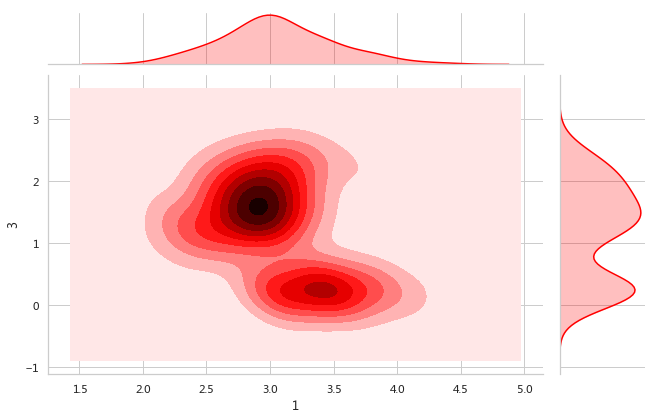

In [762]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="whitegrid", font='Microsoft YaHei')


data,target= ds.load_iris(return_X_y=True)
iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4

g = sns.jointplot(
    x=1, 
    y=3, 
    data=iris, 
    kind='kde',
    color=(1,0,0,1))


g.fig.set_size_inches(10,6)
# g.__dict__
# # data
# 可以通过返回的JointGrid可以控制每个部分的图。

- 使用JointGrid控制每个部分的绘制

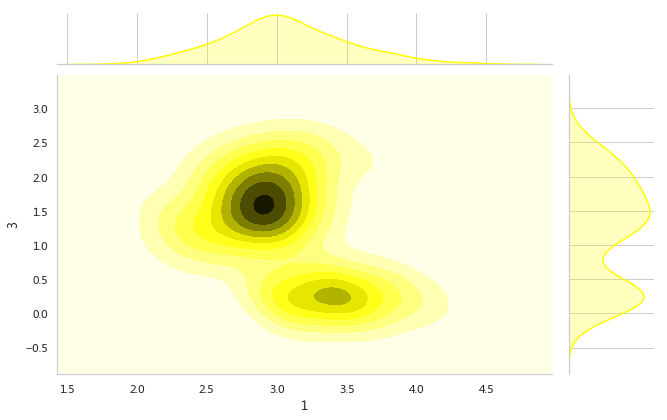

In [770]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="whitegrid", font='Microsoft YaHei')


data,target= ds.load_iris(return_X_y=True)
iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4

g = sns.jointplot(
    x=1, 
    y=3, 
    data=iris, 
    kind='kde',
    color=(1, 1, 0, 1)
)

g.plot_joint(sns.kdeplot, zorder=0, n_levels=6)

g.fig.set_size_inches(10,6)
# g.__dict__
# # data
# 可以通过返回的JointGrid可以控制每个部分的图。

## pairplot数据集两两关系图

- 函数说明：
```python
    seaborn.pairplot(
        data, 
        hue=None, 
        hue_order=None, 
        palette=None, 
        vars=None, 
        x_vars=None, 
        y_vars=None, 
        kind='scatter', 
        diag_kind='auto', 
        markers=None, 
        height=2.5, 
        aspect=1, 
        dropna=True, 
        plot_kws=None, 
        diag_kws=None, 
        grid_kws=None, 
        size=None)
```

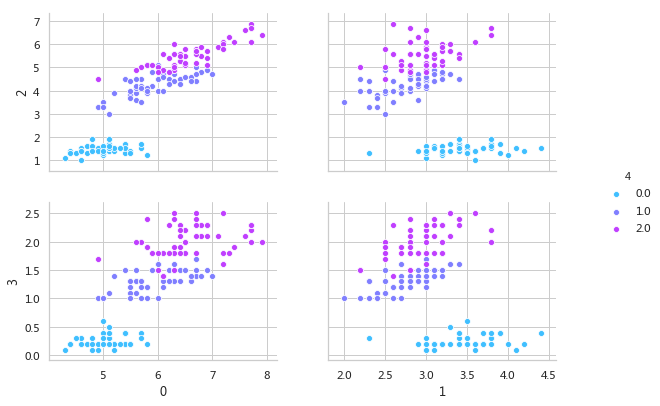

In [777]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="whitegrid", font='Microsoft YaHei')


data,target= ds.load_iris(return_X_y=True)
iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4

g = sns.pairplot(
    data=iris,
    hue=4,
    x_vars=[0,1],
    y_vars=[2,3],
    palette='cool'
)


g.fig.set_size_inches(10,6)
# g.__dict__
# # data
# 可以通过返回的JointGrid可以控制每个部分的图。

## distplot分布图

- 分布图使用多种方式显示分布信息。
    - 这个函数不支持数据源绑定。


- 函数说明：
```python
    seaborn.distplot(
        a, 
        bins=None, 
        hist=True, 
        kde=True, 
        rug=False, 
        fit=None,                # 具有fit函数的对象
        hist_kws=None,
        kde_kws=None, 
        rug_kws=None, 
        fit_kws=None, 
        color=None, 
        vertical=False, 
        norm_hist=False, 
        axlabel=None, 
        label=None, 
        ax=None)
```

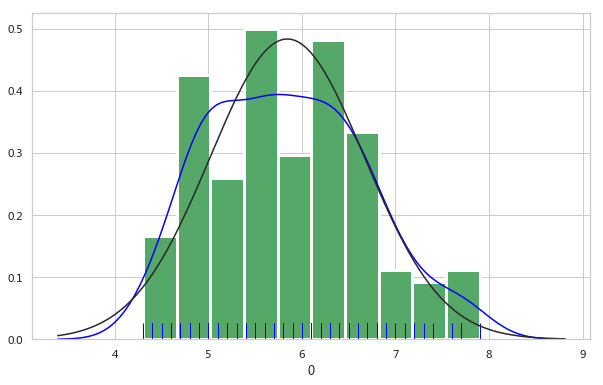

In [14]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts
from scipy.stats import norm

sns.set(style="whitegrid", font='Microsoft YaHei')


data,target= ds.load_iris(return_X_y=True)
iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4

# 拟合模型

g = sns.distplot(
    a=iris[0],
    bins=10,
    color=(0, 0, 1, 1),
    hist=True,
    kde=True,
    rug=True,
    fit = norm,     # 拟合度，拟合成正态分布
    hist_kws={
#         "histtype": "step", 
        "linewidth": 3,
        "alpha": 1, 
        "color": "g"}
)


g.figure.set_size_inches(10, 6)
# g.__dict__
# # data
# 可以通过返回的JointGrid可以控制每个部分的图。

- 既把直方图画出来，也把密度图画出来，使用刻度表示数据的均匀程度。

## kdeplot密度分布图

- 函数说明：

```python

    seaborn.kdeplot(
        data, 
        data2=None, 
        shade=False, 
        vertical=False, 
        kernel='gau', 
        bw='scott', 
        gridsize=100, 
        cut=3, 
        clip=None, 
        legend=True, 
        cumulative=False, 
        shade_lowest=True,     # 最低部分不绘制
        cbar=False, 
        cbar_ax=None, 
        cbar_kws=None, 
        ax=None, 
        **kwargs)
    
```

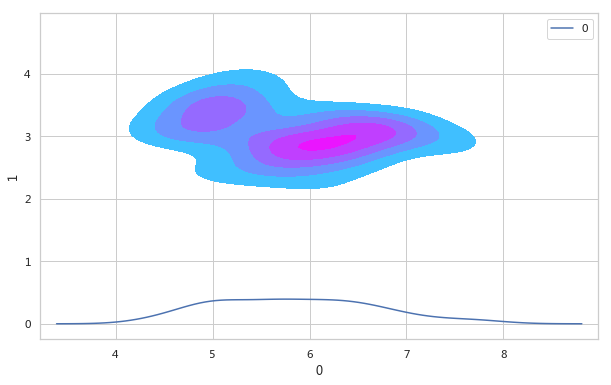

In [807]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="whitegrid", font='Microsoft YaHei')


data,target= ds.load_iris(return_X_y=True)
iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4

g = sns.kdeplot(
    data=iris[0],
)

g = sns.kdeplot(
    data=iris[0],
    data2=iris[1],
    shade=True,
    n_levels=5,
    cmap='cool',
    shade_lowest=False
#     ax = g
)


g.figure.set_size_inches(10,6)
# g.__dict__
# # data
# 可以通过返回的JointGrid可以控制每个部分的图。

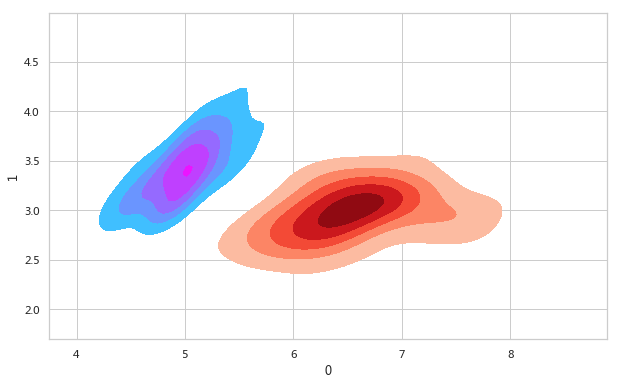

In [809]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="whitegrid", font='Microsoft YaHei')


data,target= ds.load_iris(return_X_y=True)
iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4



g = sns.kdeplot(
    data=iris[0][:50],
    data2=iris[1][:50],
    shade=True,
    n_levels=5,
    cmap='cool',
    shade_lowest=False,
#     ax = g
)
g = sns.kdeplot(
    data=iris[0][100:150],
    data2=iris[1][100:150],
    shade=True,
    n_levels=5,
    cmap='Reds',
    kernel='cos',
    shade_lowest=False,     # 最低的部分不绘制。
#     ax = g
)

g.figure.set_size_inches(10,6)
# g.__dict__
# # data
# 可以通过返回的JointGrid可以控制每个部分的图。

## rugplot刻度图

- 函数说明

```python
    seaborn.rugplot(
        a, 
        height=0.05, 
        axis='x', 
        ax=None, 
        **kwargs)
```

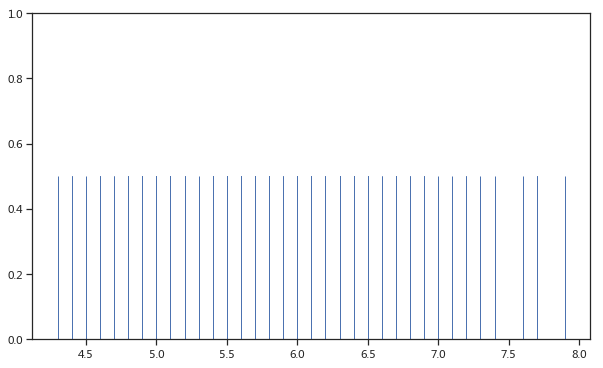

In [836]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="ticks", font='Microsoft YaHei')


data,target= ds.load_iris(return_X_y=True)
iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4



g = sns.rugplot(
    a=iris[0],
    height=0.5,
)

g.figure.set_size_inches(10,6)
# g.__dict__
# # data
# 可以通过返回的JointGrid可以控制每个部分的图。

# Seaborn图形-回归图

- 回归图一共三个：

```python
    lmplot(x, y, data[, hue, col, row, palette, …])	
        # 绘制数据与回归模型。
    regplot(x, y[, data, x_estimator, x_bins, …])	
        # 绘制数据与线性回归模型。
    residplot(x, y[, data, lowess, x_partial, …])	
        # 绘制线性回归的残差；
```


## lmplot回归模型图

- 返回FacetGrid对象。
- 函数说明：
```python
    seaborn.lmplot(
        x, y, data, 
        hue=None, 
        col=None, row=None, 
        palette=None, 
        col_wrap=None, 
        height=5, aspect=1, 
        markers='o', 
        sharex=True, sharey=True, 
        hue_order=None, col_order=None, row_order=None, 
        legend=True, legend_out=True, 
        x_estimator=None, 
        x_bins=None, 
        x_ci='ci', 
        scatter=True, 
        fit_reg=True, 
        ci=95, n_boot=1000, 
        units=None, 
        order=1, 
        logistic=False, 
        lowess=False, 
        robust=False, 
        logx=False, 
        x_partial=None, 
        y_partial=None, 
        truncate=False, 
        x_jitter=None, y_jitter=None, 
        scatter_kws=None, 
        line_kws=None, 
        size=None)
```

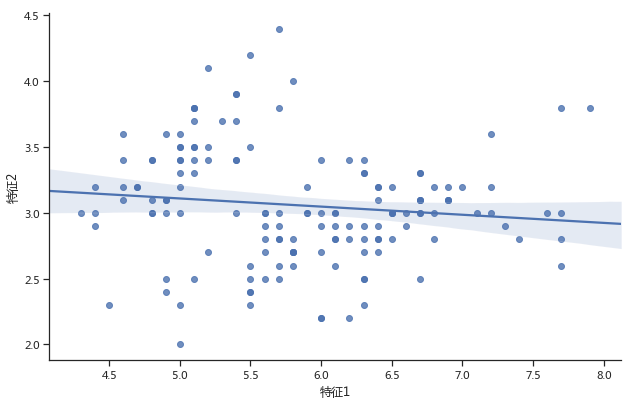

In [835]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="ticks", font='Microsoft YaHei')


data,target= ds.load_iris(return_X_y=True)
iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4

iris.rename(
    columns={
        0: '特征1',
        1: '特征2',
        2: '特征3',
        3: '特征4',
        4: '标签'
    }, 
    inplace=True
)


g = sns.lmplot(x='特征1', y='特征2', data=iris)

g.fig.set_size_inches(10,6)

- 按照多类数据分类回归

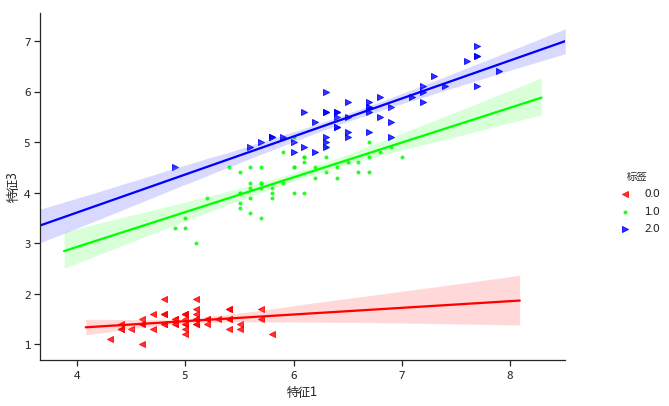

In [834]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="ticks", font='Microsoft YaHei')


data,target= ds.load_iris(return_X_y=True)
iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4

iris.rename(
    columns={
        0: '特征1',
        1: '特征2',
        2: '特征3',
        3: '特征4',
        4: '标签'
    }, 
    inplace=True
)


# g = sns.lmplot(
#     x='特征1', y='特征3', 
#     hue='标签', 
#     data=iris, 
#     markers=['<', '.', '>'], 
#     palette='cool')

g = sns.lmplot(
    x='特征1', y='特征3', 
    hue='标签', 
    data=iris, 
    markers=['<', '.', '>'], 
    palette={
        0: (1, 0, 0),
        1: (0, 1, 0),
        2: (0, 0, 1)
    })

g.fig.set_size_inches(10,6)

- 网格显示

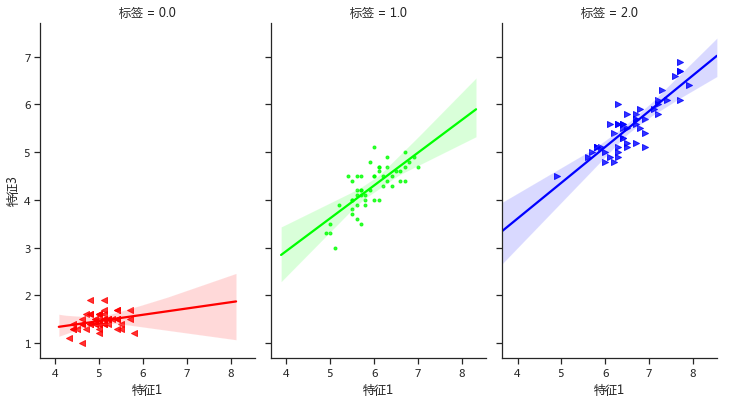

In [841]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="ticks", font='Microsoft YaHei')


data,target= ds.load_iris(return_X_y=True)
iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4

iris.rename(
    columns={
        0: '特征1',
        1: '特征2',
        2: '特征3',
        3: '特征4',
        4: '标签'
    }, 
    inplace=True
)


# g = sns.lmplot(
#     x='特征1', y='特征3', 
#     hue='标签', 
#     data=iris, 
#     markers=['<', '.', '>'], 
#     palette='cool')

g = sns.lmplot(
    x='特征1', y='特征3', 
    hue='标签',
    col='标签',
    data=iris, 
    ci=100,
    markers=['<', '.', '>'], 
    palette={
        0: (1, 0, 0),
        1: (0, 1, 0),
        2: (0, 0, 1)
    })

g.fig.set_size_inches(10,6)

- 对数据做估计处理：重叠的点，用它们的均值点做训练，

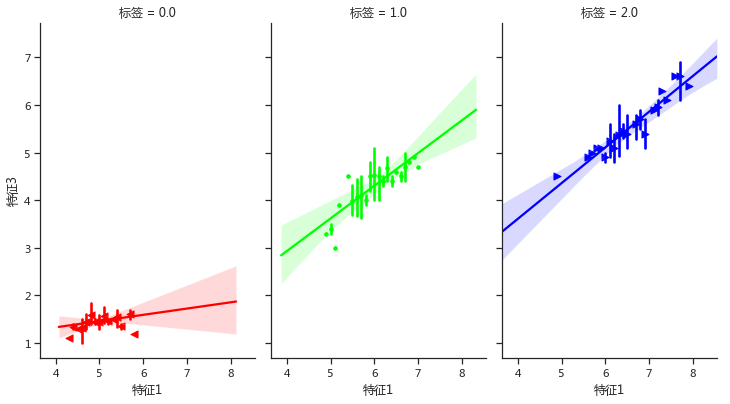

In [842]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="ticks", font='Microsoft YaHei')


data,target= ds.load_iris(return_X_y=True)
iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4

iris.rename(
    columns={
        0: '特征1',
        1: '特征2',
        2: '特征3',
        3: '特征4',
        4: '标签'
    }, 
    inplace=True
)


# g = sns.lmplot(
#     x='特征1', y='特征3', 
#     hue='标签', 
#     data=iris, 
#     markers=['<', '.', '>'], 
#     palette='cool')

g = sns.lmplot(
    x='特征1', y='特征3', 
    hue='标签',
    col='标签',
    x_estimator=np.mean,
    data=iris, 
    ci=100,
    markers=['<', '.', '>'], 
    palette={
        0: (1, 0, 0),
        1: (0, 1, 0),
        2: (0, 0, 1)
    })

g.fig.set_size_inches(10,6)

## regplot线性回归模型图

- 函数定义：

- 该函数与lmplot类似，但不支持网格处理。
```python
    seaborn.regplot(
        x, y, data=None, 
        x_estimator=None, x_bins=None, x_ci='ci', 
        scatter=True, 
        fit_reg=True, 
        ci=95, 
        n_boot=1000, 
        units=None, 
        order=1, 
        logistic=False, 
        lowess=False, 
        robust=False, 
        logx=False, 
        x_partial=None, y_partial=None, 
        truncate=False, 
        dropna=True, 
        x_jitter=None, y_jitter=None, 
        label=None, 
        color=None, 
        marker='o', 
        scatter_kws=None, 
        line_kws=None, 
        ax=None)
```

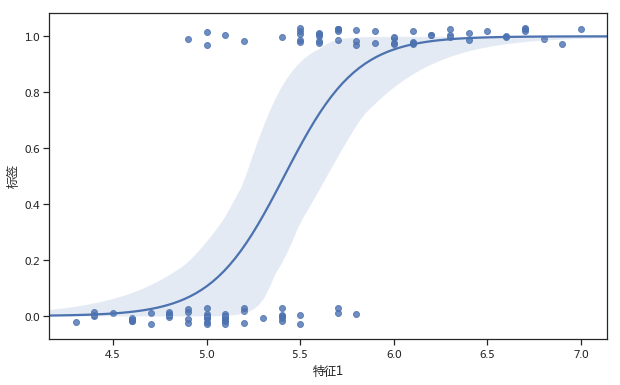

In [858]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="ticks", font='Microsoft YaHei')


data,target= ds.load_iris(return_X_y=True)
data = data[0:100]
target = target[0:100]
iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4

iris.rename(
    columns={
        0: '特征1',
        1: '特征2',
        2: '特征3',
        3: '特征4',
        4: '标签'
    }, 
    inplace=True
)



g = sns.regplot(
    x='特征1', y='标签', 
#     x_estimator=np.mean,
    data=iris, 
    ci=100,
    logistic=True, # 可以做逻辑回归
    y_jitter=0.03
)

g.figure.set_size_inches(10,6)



## residplot线性回归残差图

- 函数定义说明：

```python

    seaborn.residplot(
        x, y, data=None, 
        lowess=False,        # 残差进行平滑拟合
        x_partial=None,      # 混淆变量，并在绘图前从x或y变量中删除。
        y_partial=None, 
        order=1, 
        robust=False,        # 鲁棒性
        dropna=True, 
        label=None, 
        color=None, 
        scatter_kws=None, 
        line_kws=None, 
        ax=None)
```

- 对（x, y）进行线性回归， 并使用把回归线平行x轴，改变x点的位置。

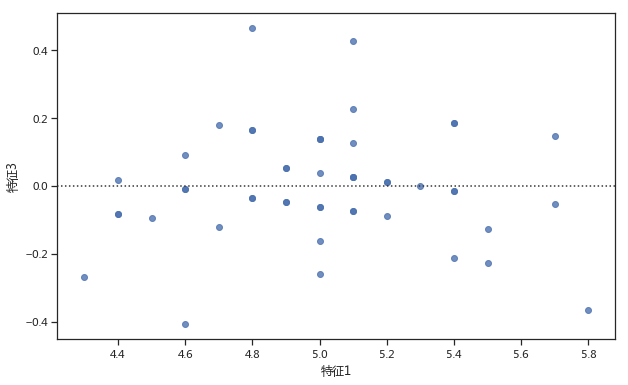

In [864]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="ticks", font='Microsoft YaHei')


data,target= ds.load_iris(return_X_y=True)
# data = data [0:100]
# target = target[0:100]
iris = pd.DataFrame(np.c_[data, target])  # 原鸢尾花的标签合并到第四列，列名自动生成为0，1，2，3，4

iris.rename(
    columns={
        0: '特征1',
        1: '特征2',
        2: '特征3',
        3: '特征4',
        4: '标签'
    }, 
    inplace=True
)



g = sns.residplot(
    x='特征1', y='特征3', 
    data=iris, 
)

g.figure.set_size_inches(10,6)

# Seaborn图形-矩阵图

- 矩阵图包含两个：
    - 热图与聚类图

```python

    heatmap(data[, vmin, vmax, cmap, center, …])	
        # 热图
    clustermap(data[, pivot_kws, method, …])	
        # 聚类图
```

## heatmap热图

- 本质上是2D直方图

- 函数定义

```python
    seaborn.heatmap(
        data,     # 2d数据
        vmin=None, vmax=None, 
        cmap=None, 
        center=None, 
        robust=False, 
        annot=None, 
        fmt='.2g', 
        annot_kws=None, 
        linewidths=0, 
        linecolor='white', 
        cbar=True, 
        cbar_kws=None, 
        cbar_ax=None, 
        square=False, 
        xticklabels='auto', 
        yticklabels='auto', 
        mask=None, 
        ax=None, 
        **kwargs)
```

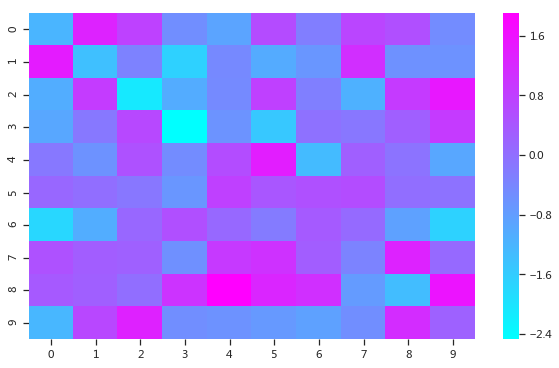

In [875]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="ticks", font='Microsoft YaHei')

data = np.random.randn(10, 10)

g = sns.heatmap(
    data = data,
#     annot=True, 
    fmt="5.2f",
    cmap="cool"
)

g.figure.set_size_inches(10,6)

## clustermap聚类图

- 本质也是热图，只是在边界增加了结构。

- 函数定义

```python
    seaborn.clustermap(
        data, 
        pivot_kws=None, 
        method='average', 
        metric='euclidean', 
        z_score=None, 
        standard_scale=None, 
        figsize=None, 
        cbar_kws=None, 
        row_cluster=True, 
        col_cluster=True, 
        row_linkage=None, 
        col_linkage=None, 
        row_colors=None, 
        col_colors=None, 
        mask=None, *
        *kwargs)
```

- 返回ClusterGrid对象

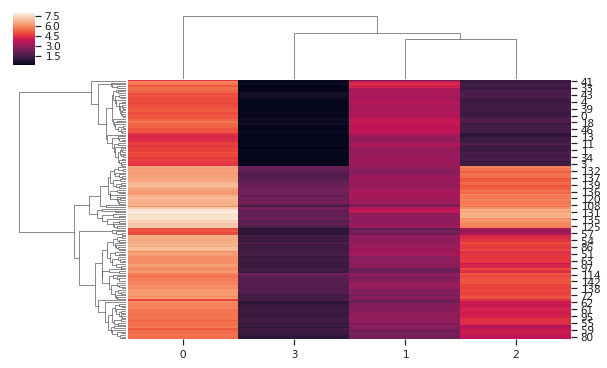

In [879]:
%matplotlib inline 
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import sklearn.datasets as ds
import pandas as pd
from matplotlib.colors import Normalize
import tushare as ts

sns.set(style="ticks", font='Microsoft YaHei')


data,target= ds.load_iris(return_X_y=True)

iris = pd.DataFrame(data)
g = sns.clustermap( 
    data=iris, 
)

g.fig.set_size_inches(10,6)